In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

df = pd.read_csv("../data/train.csv")

print("Розмірність:", df.shape)
print("\nПерші 5 рядків:\n", df.head())

table = pd.DataFrame({
    "Ознака": df.columns,
    "Тип даних": df.dtypes.astype(str),
    "Кількість пропусків": df.isnull().sum().values
})

Розмірність: (43957, 15)

Перші 5 рядків:
    age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0

In [8]:
def type_into_ukrainian(cell):
    if cell == "int64":
        return "Числовий"
    elif cell == "object":
        return "Категоріальний"

In [9]:
table["Тип даних"] = table["Тип даних"].apply(type_into_ukrainian)

In [10]:
table.loc["age", "Пояснення змінної"] = "Вік в роках"
table.loc["workclass", "Пояснення змінної"] = "Тип зайнятості особи"
table.loc["fnlwgt", "Пояснення змінної"] = "Вага(важливість) спостереження"
table.loc["education", "Пояснення змінної"] = "Освіта"
table.loc["educational-num", "Пояснення змінної"] = "Освітній рівень в числовому форматі"
table.loc["marital-status", "Пояснення змінної"] = "Сімейний стан"
table.loc["occupation", "Пояснення змінної"] = "Професія(рід зайнятості)"
table.loc["relationship", "Пояснення змінної"] = "Роль в родині"
table.loc["race", "Пояснення змінної"] = "Етнічна група(раса_"
table.loc["gender", "Пояснення змінної"] = "Стать"
table.loc["capital-gain", "Пояснення змінної"] = "Дохід від інвестицій"
table.loc["capital-loss", "Пояснення змінної"] = "Втрати від інвестицій"
table.loc["hours-per-week", "Пояснення змінної"] = "Об'єм роботи в тиждень(в годинах)"
table.loc["native-country", "Пояснення змінної"] = "Країна походження"
table.loc["income_>50K", "Пояснення змінної"] = "Перевищення 50.000 доходу на рік"
table.loc["income_>50K","Тип даних"] = "Цільова змінна - бінарна(0/1)"


In [11]:
table.drop("Кількість пропусків", axis=1)

,Ознака,Тип даних,Пояснення змінної
age,age,Числовий,Вік в роках
workclass,workclass,Категоріальний,Тип зайнятості особи
fnlwgt,fnlwgt,Числовий,Вага(важливість) спостереження
education,education,Категоріальний,Освіта
educational-num,educational-num,Числовий,Освітній рівень в числовому форматі
marital-status,marital-status,Категоріальний,Сімейний стан
occupation,occupation,Категоріальний,Професія(рід зайнятості)
relationship,relationship,Категоріальний,Роль в родині
race,race,Категоріальний,Етнічна група(раса_
gender,gender,Категоріальний,Стать


In [7]:
table[table["Тип даних"] == "Категоріальний"].drop("Кількість пропусків", axis=1)

,Ознака,Тип даних,Пояснення змінної
workclass,workclass,Категоріальний,Тип зайнятості особи
education,education,Категоріальний,Освіта
marital-status,marital-status,Категоріальний,Сімейний стан
occupation,occupation,Категоріальний,Професія(рід зайнятості)
relationship,relationship,Категоріальний,Роль в родині
race,race,Категоріальний,Етнічна група(раса_
gender,gender,Категоріальний,Стать
native-country,native-country,Категоріальний,Країна походження


In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({
    "Кількість пропусків": missing,
    "Відсоток (%)": missing_percent
})

In [9]:
missing_table

,Кількість пропусків,Відсоток (%)
occupation,2506,5.70
workclass,2498,5.68
native-country,763,1.74
age,0,0.00
fnlwgt,0,0.00
education,0,0.00
educational-num,0,0.00
marital-status,0,0.00
relationship,0,0.00
race,0,0.00


/var/folders/p2/l72stm1945jf6ghs47v_5rd40000gn/T/ipykernel_46849/2505538535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent, y=missing.index, palette="viridis")


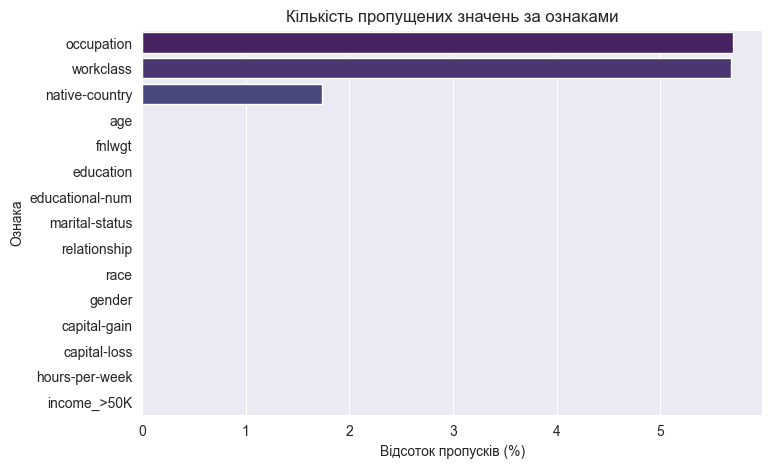

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_percent, y=missing.index, palette="viridis")
plt.title("Кількість пропущених значень за ознаками")
plt.xlabel("Відсоток пропусків (%)")
plt.ylabel("Ознака")
plt.show()  

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('income_>50K') 

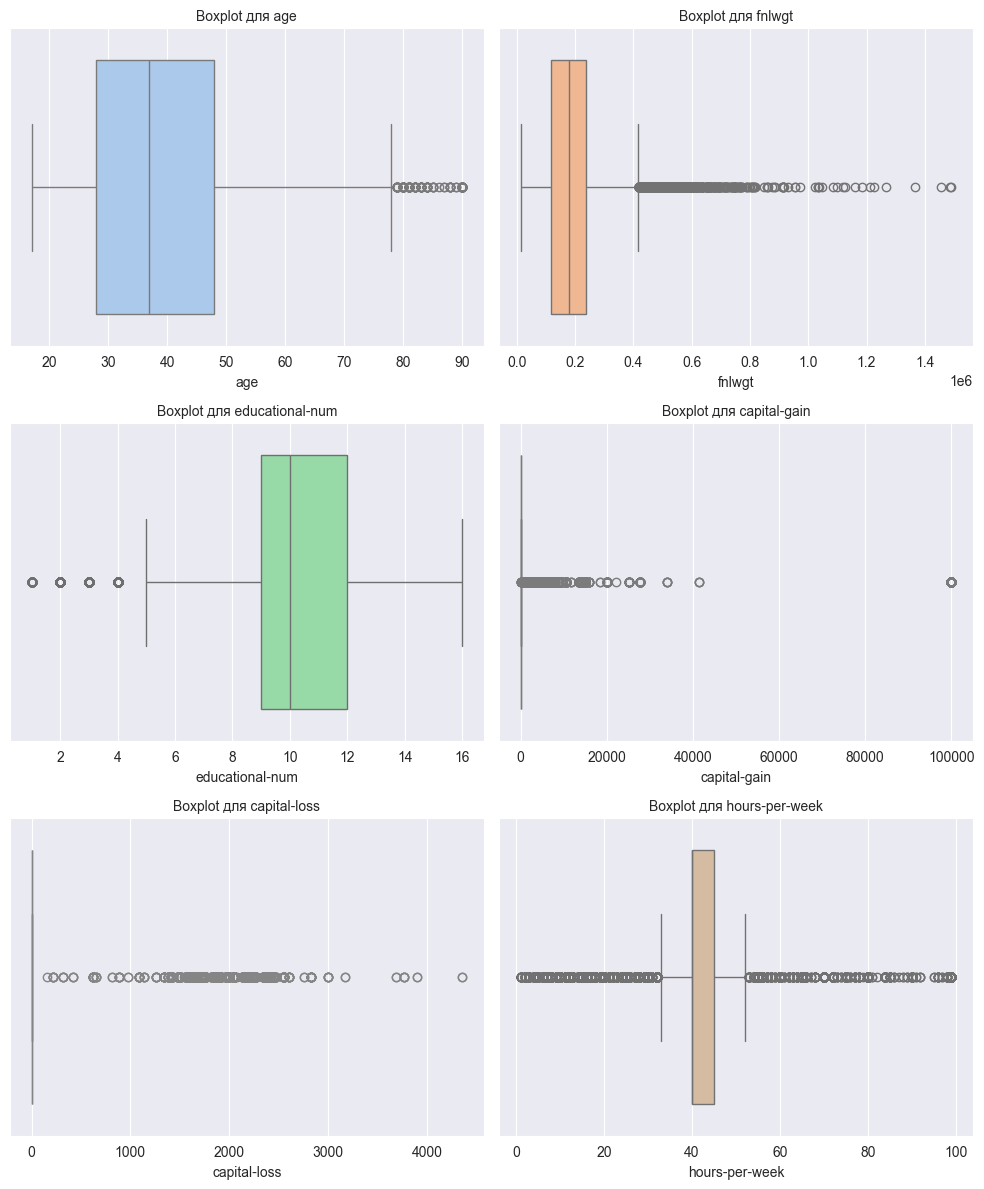

In [12]:
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

colors = sns.color_palette("pastel", len(numeric_cols))

plt.figure(figsize=(10, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color=colors[i - 1])
    plt.title(f"Boxplot для {col}", fontsize=10)
plt.tight_layout()
plt.show()


In [13]:
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_table = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Кількість викидів'])
outlier_table['Частка від загальної кількості (%)'] = (outlier_table['Кількість викидів'] / len(df) * 100).round(2)

In [14]:
outlier_table.sort_values(by='Кількість викидів', ascending=False)

,Кількість викидів,Частка від загальної кількості (%)
hours-per-week,12167,27.68
capital-gain,3627,8.25
capital-loss,2073,4.72
educational-num,1629,3.71
fnlwgt,1324,3.01
age,193,0.44


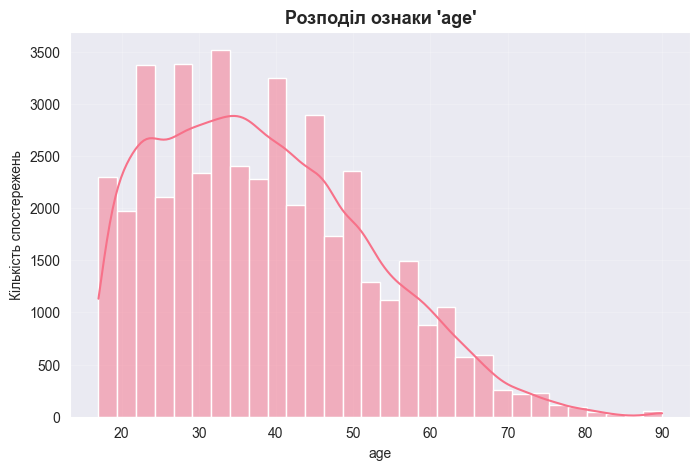

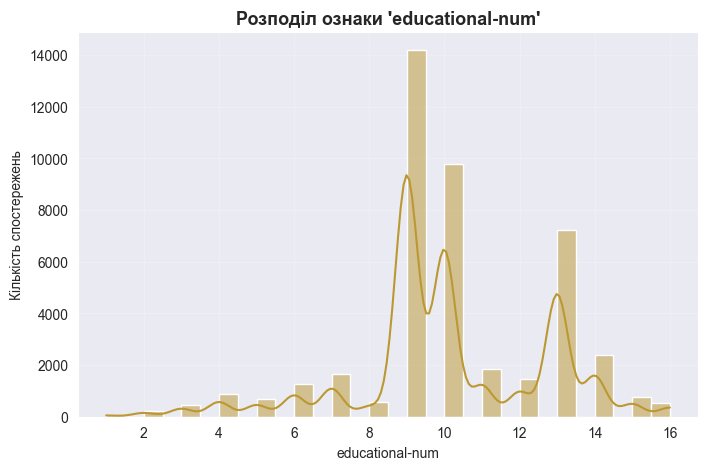

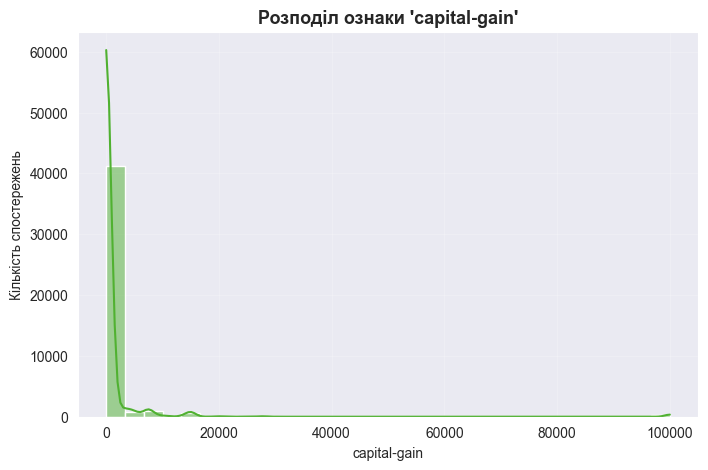

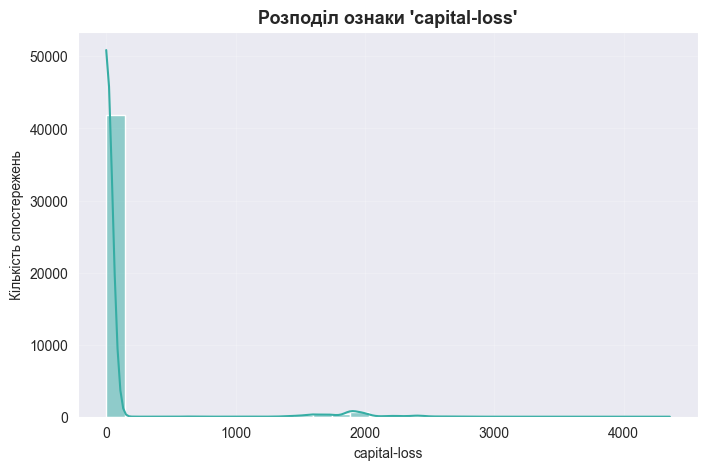

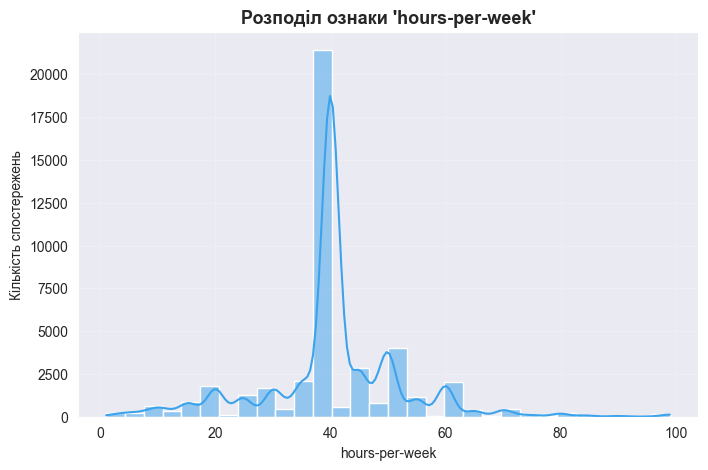

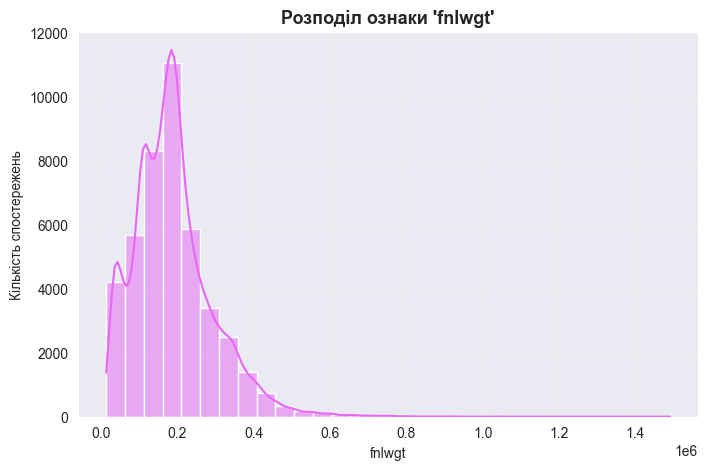

In [15]:
numeric_cols = ['age', 'educational-num', 'capital-gain', 
                'capital-loss', 'hours-per-week', 'fnlwgt']

colors = sns.color_palette("husl", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color=colors[i])
    plt.title(f"Розподіл ознаки '{col}'", fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Кількість спостережень")
    plt.grid(alpha=0.2)
    plt.show()


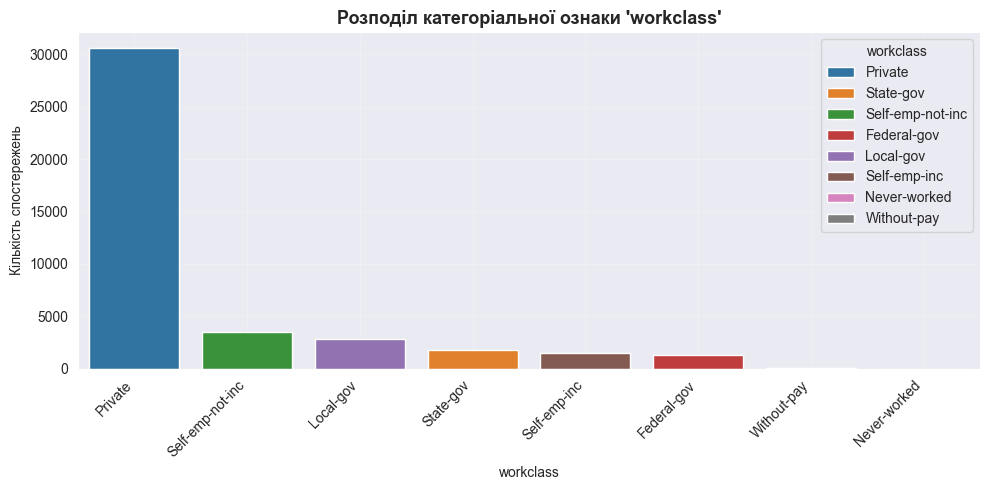

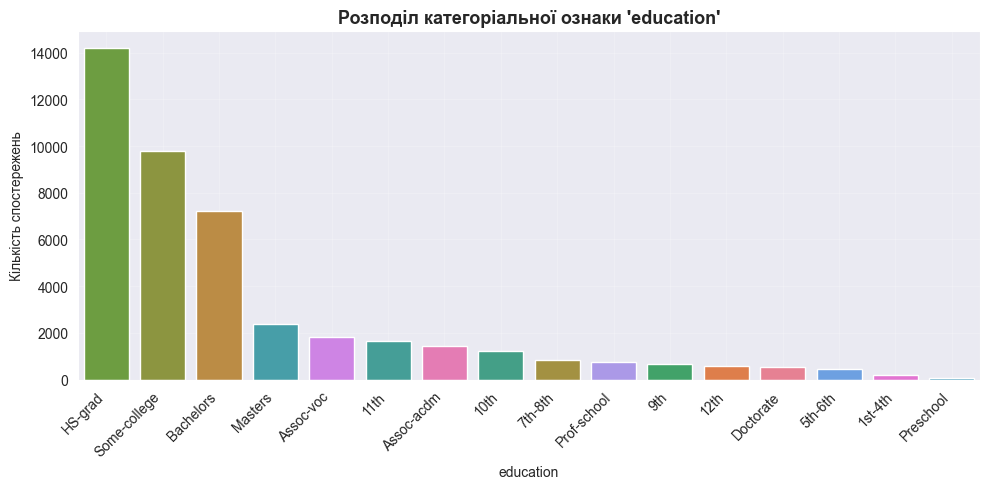

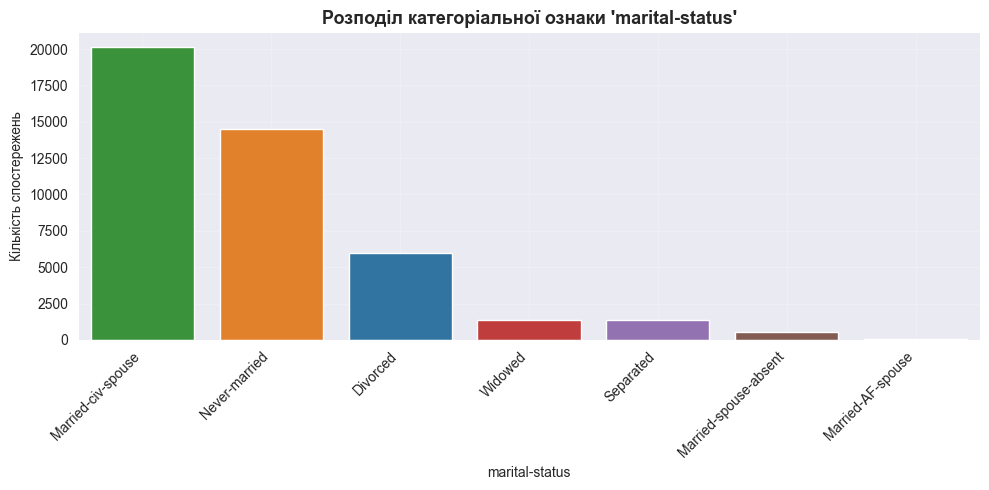

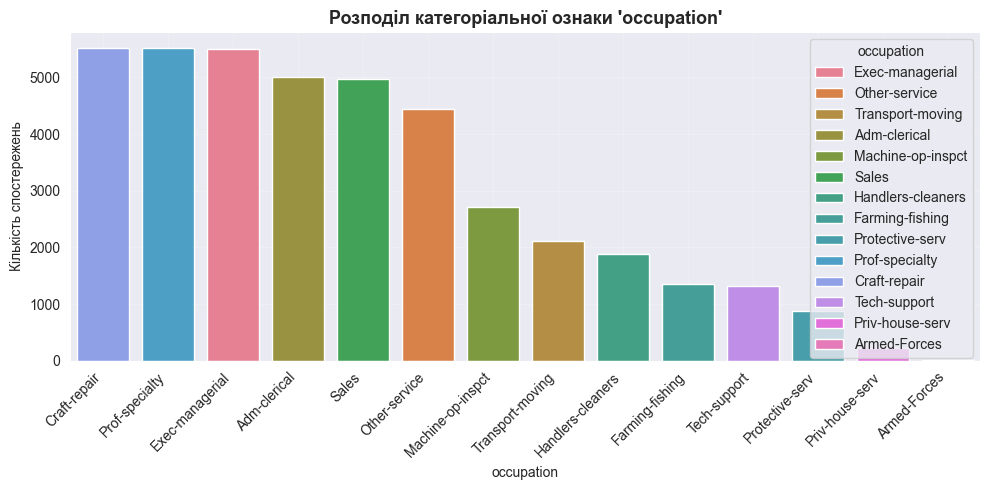

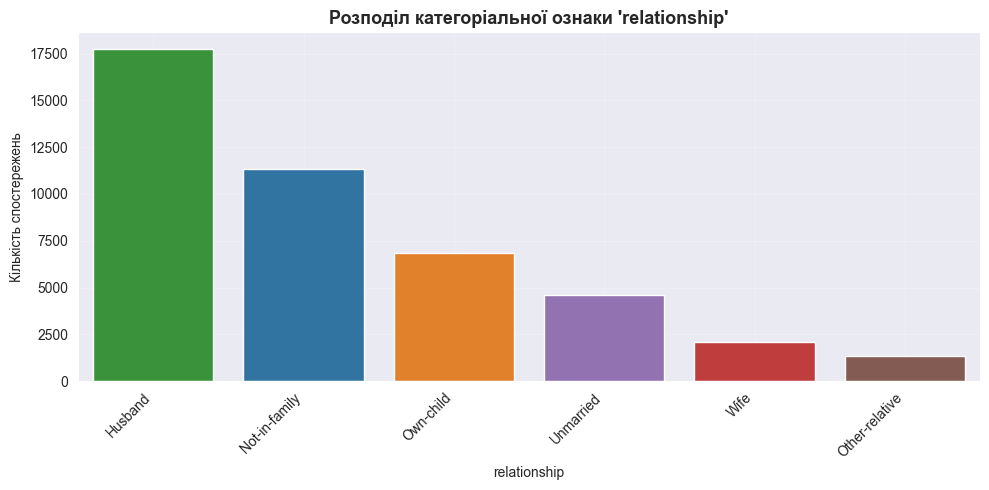

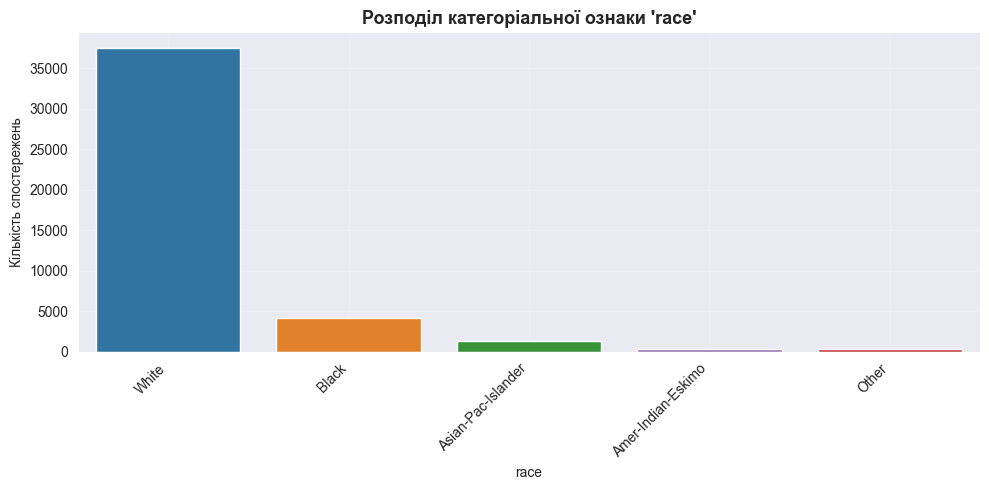

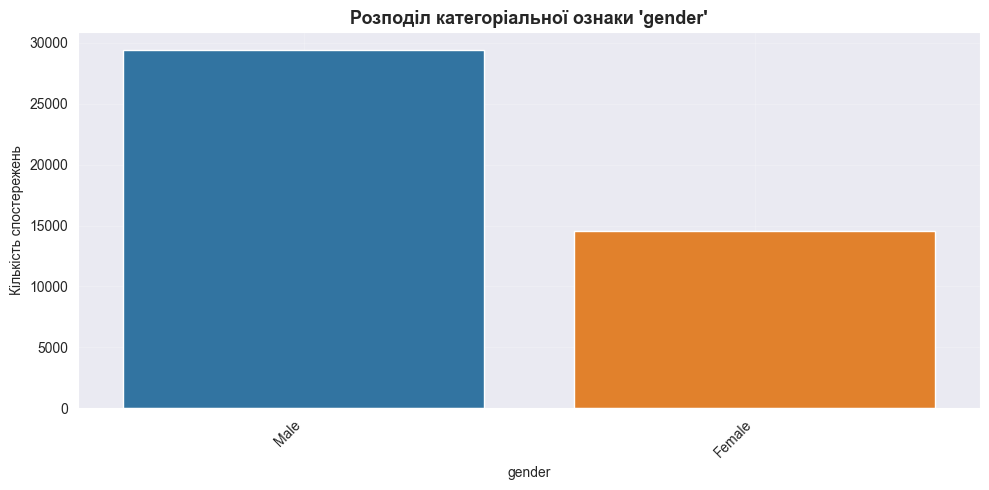

/var/folders/p2/l72stm1945jf6ghs47v_5rd40000gn/T/ipykernel_46849/2955622222.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


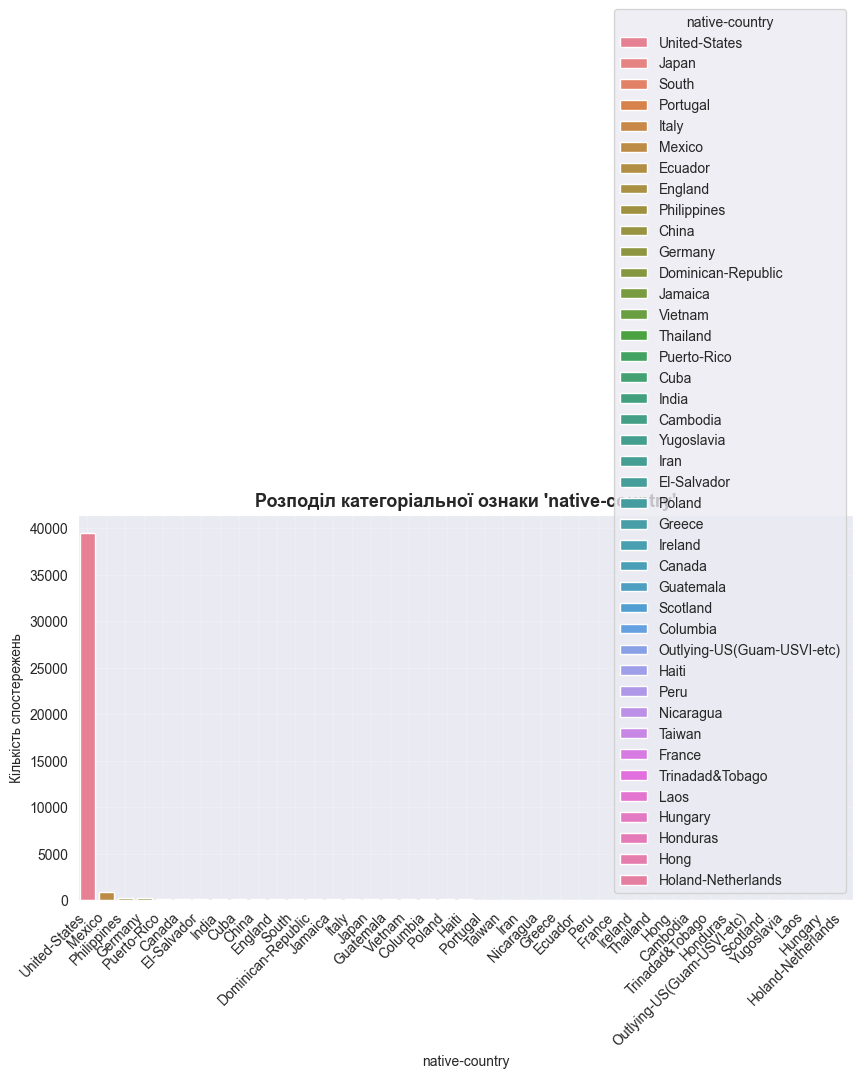

In [16]:
categorical_cols = [
    'workclass', 'education', 'marital-status',
    'occupation', 'relationship', 'race',
    'gender', 'native-country'
]

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(10, 5))

    order = df[col].value_counts().index

    sns.countplot(
        data=df, x=col, order=order,
        hue = col,
    )

    plt.title(f"Розподіл категоріальної ознаки '{col}'", 
              fontsize=13, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Кількість спостережень")
    plt.xlabel(col)
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


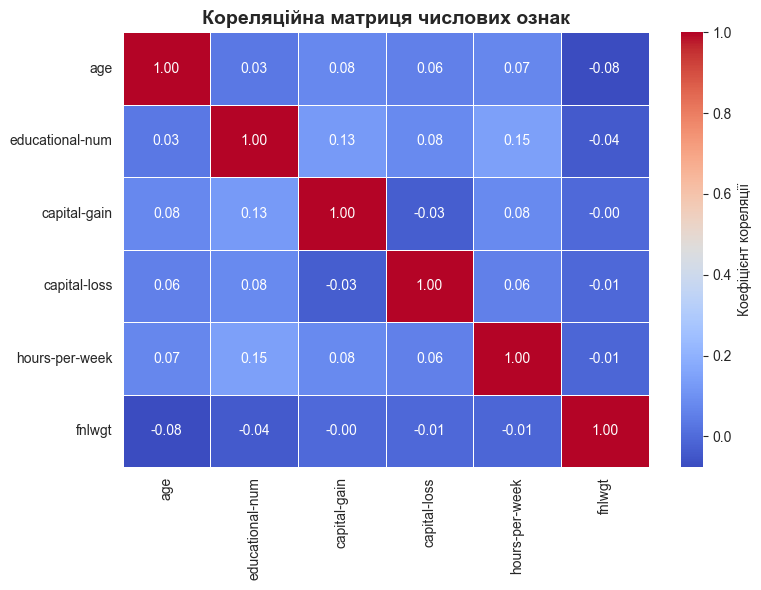

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'age', 'educational-num', 'capital-gain',
    'capital-loss', 'hours-per-week', 'fnlwgt'
]

corr_matrix = df[numeric_cols].corr(method='pearson')

# Візуалізація heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,              
    cmap='coolwarm',        
    fmt=".2f",               
    linewidths=0.5,         
    cbar_kws={'label': 'Коефіцієнт кореляції'}
)
plt.title("Кореляційна матриця числових ознак", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


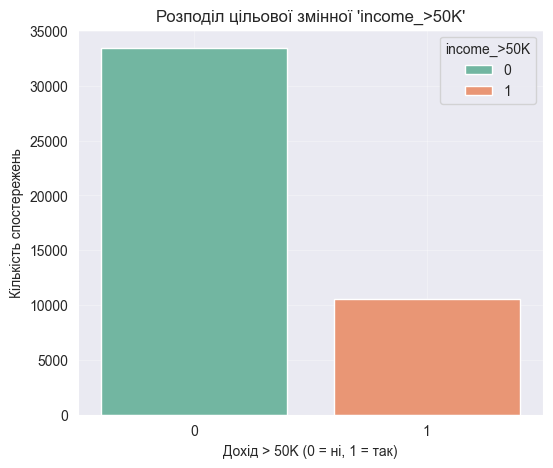

In [18]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='income_>50K', palette='Set2', hue ='income_>50K' )
plt.title("Розподіл цільової змінної 'income_>50K'")
plt.xlabel("Дохід > 50K (0 = ні, 1 = так)")
plt.ylabel("Кількість спостережень")
plt.grid(alpha=0.3)
plt.show()



In [19]:
demo_df = pd.DataFrame()
demo_df['income_>50K'] = df["income_>50K"].value_counts() / len(df)

In [20]:
demo_df

,income_>50K
income_>50K,
0,0.760721
1,0.239279


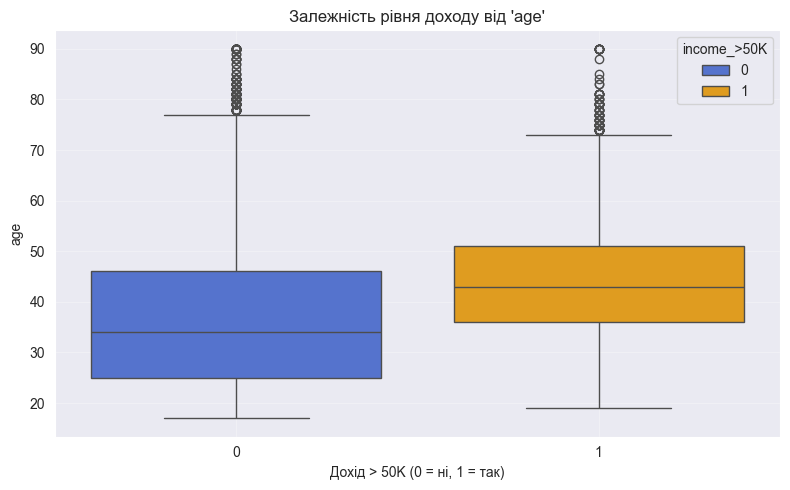

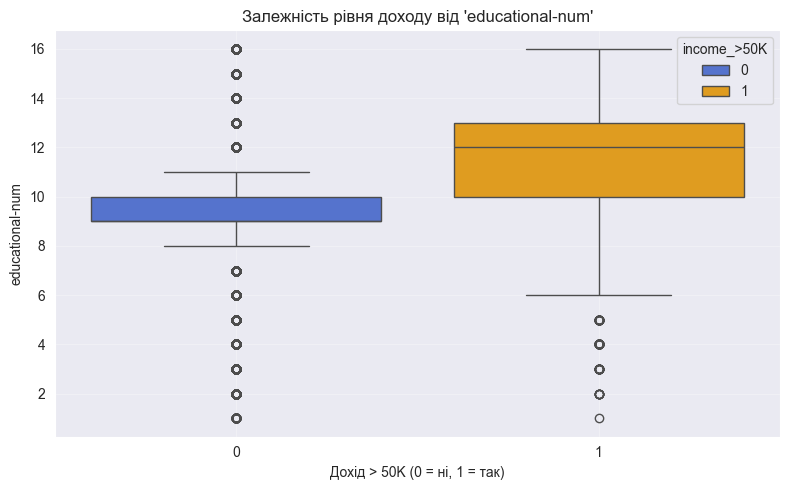

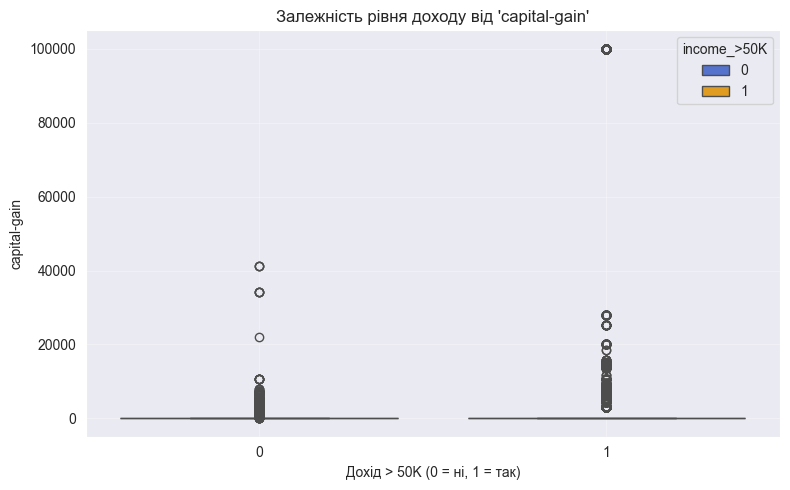

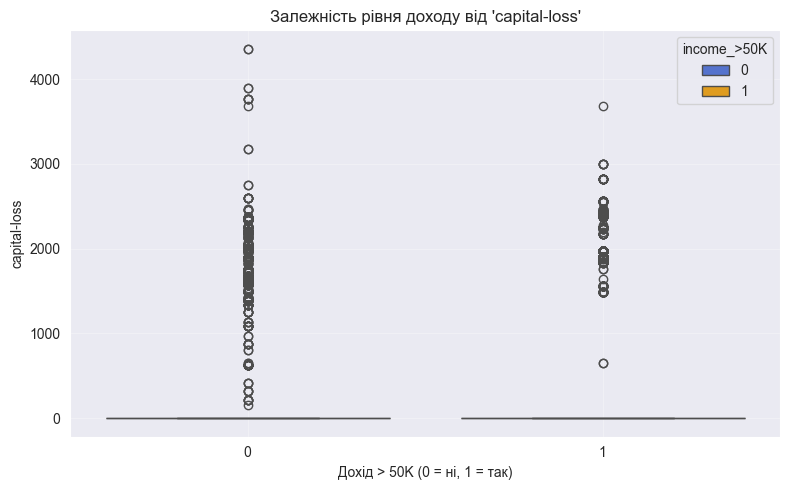

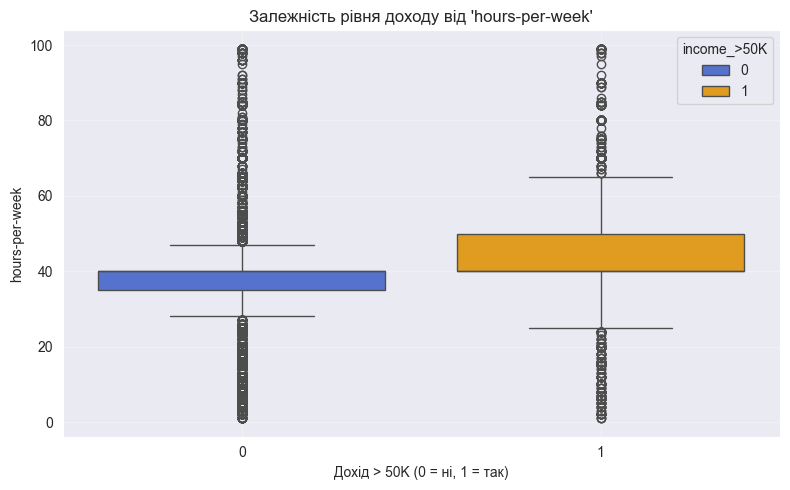

In [21]:
numeric_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
palette = {0: "royalblue", 1: "orange"}
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='income_>50K', y=col, hue = 'income_>50K', palette=palette)
    plt.title(f"Залежність рівня доходу від '{col}'")
    plt.xlabel("Дохід > 50K (0 = ні, 1 = так)")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


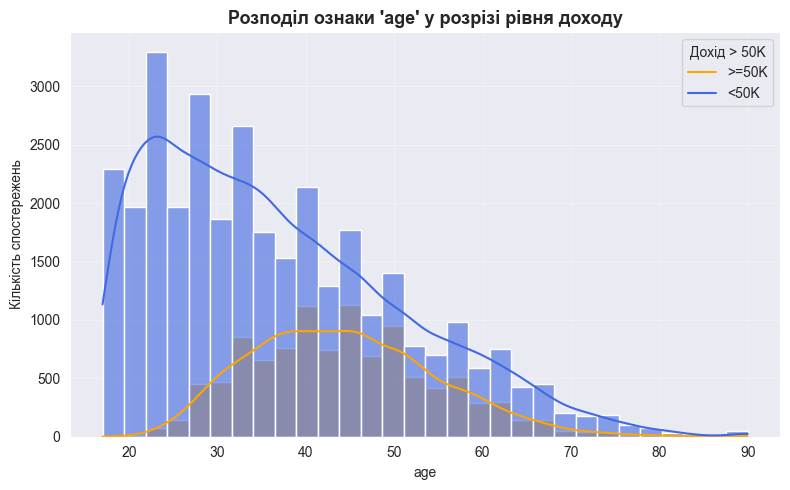

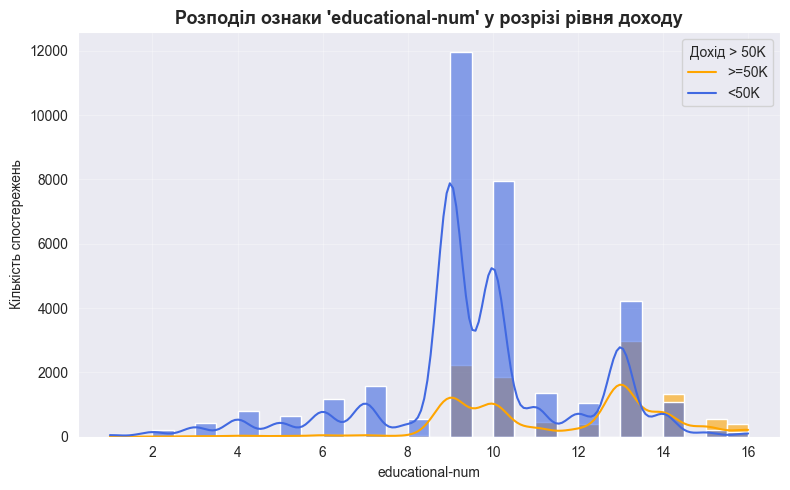

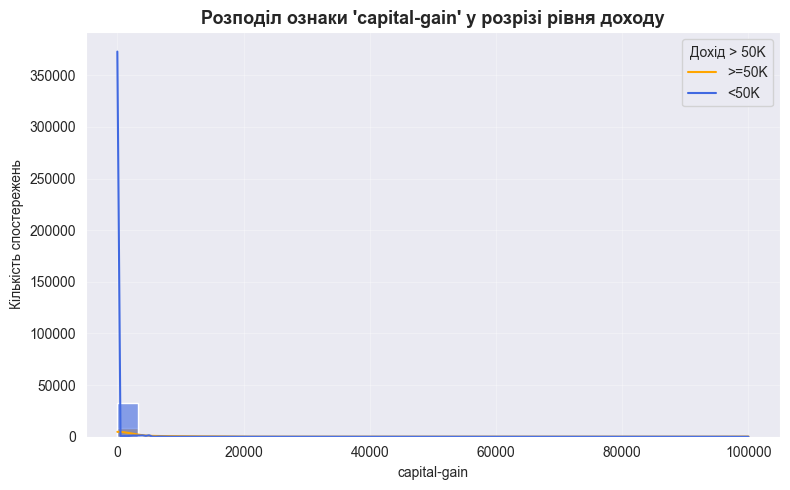

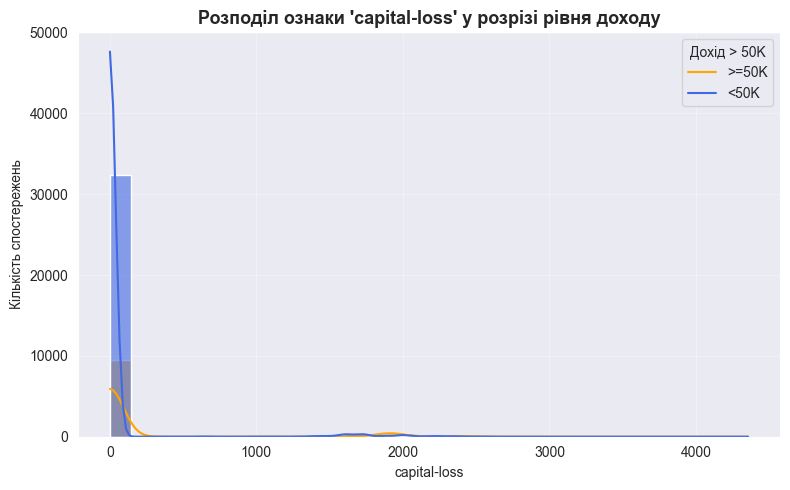

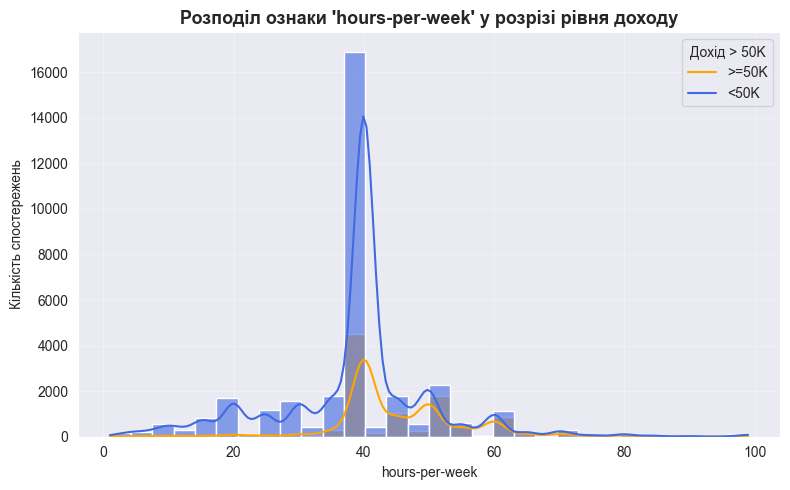

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = {0: "royalblue", 1: "orange"}
numeric_cols = ['age', 'educational-num', 'capital-gain', 
                'capital-loss', 'hours-per-week']


for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x=col,
        hue='income_>50K',      
        bins=30,
        kde=True,
        palette=palette,
        alpha=0.6
    )
    plt.title(f"Розподіл ознаки '{col}' у розрізі рівня доходу", fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Кількість спостережень")
    plt.legend(title="Дохід > 50K", labels=[">=50K", "<50K"])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


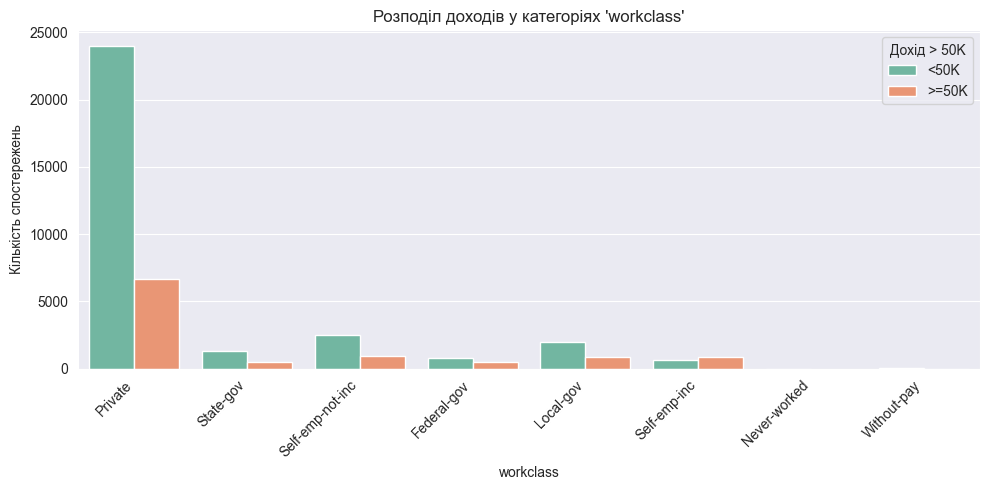

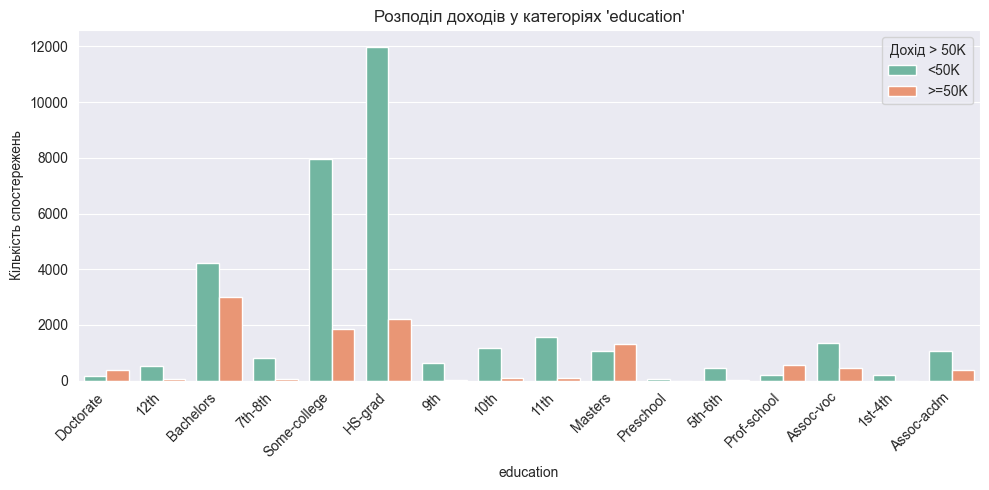

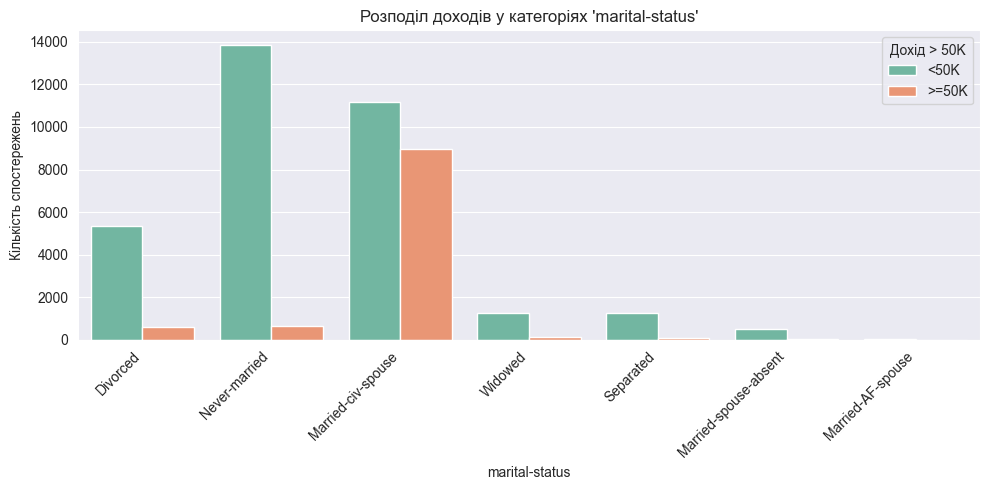

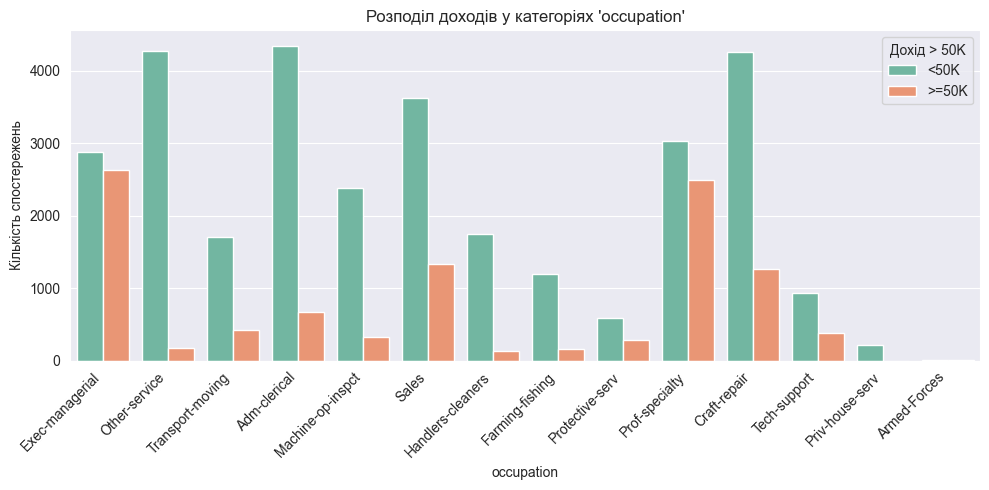

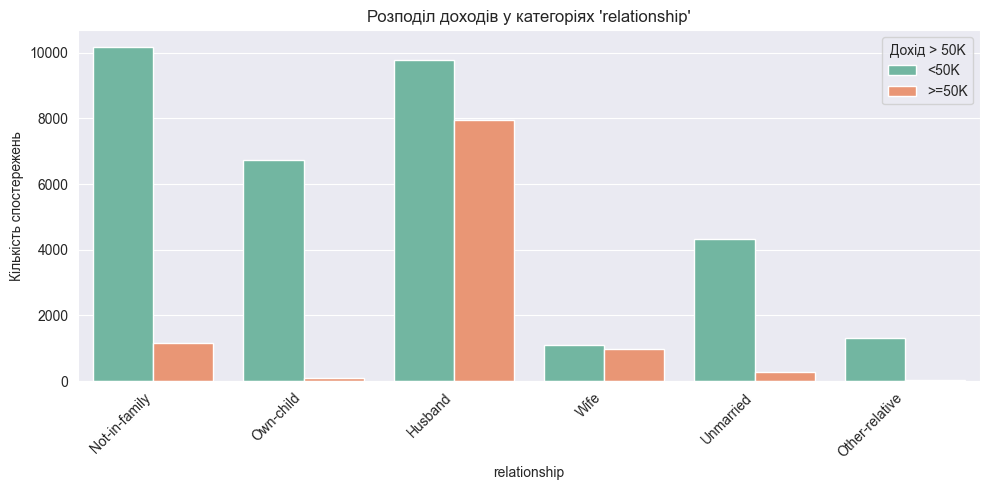

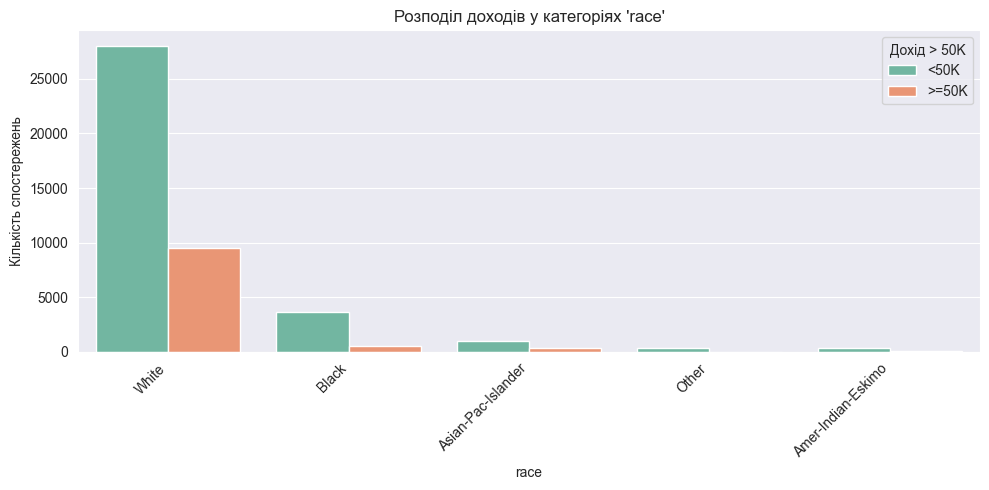

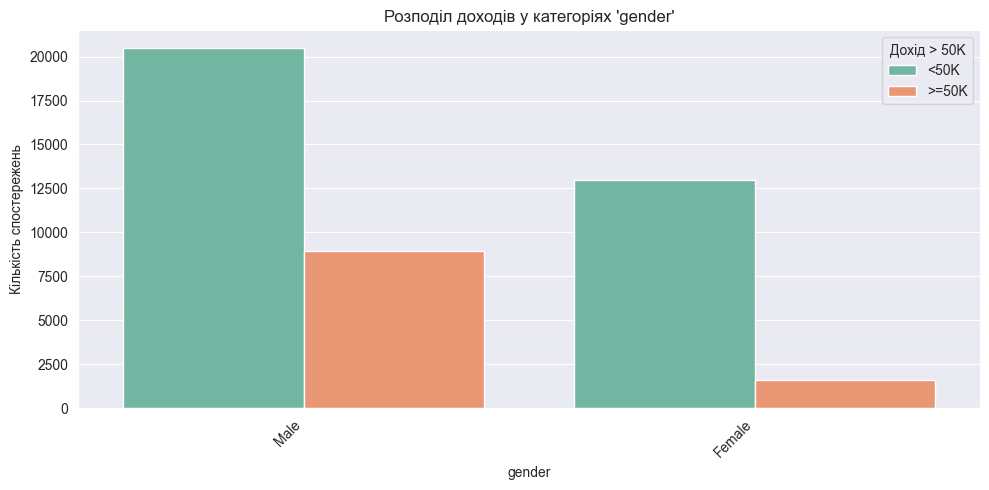

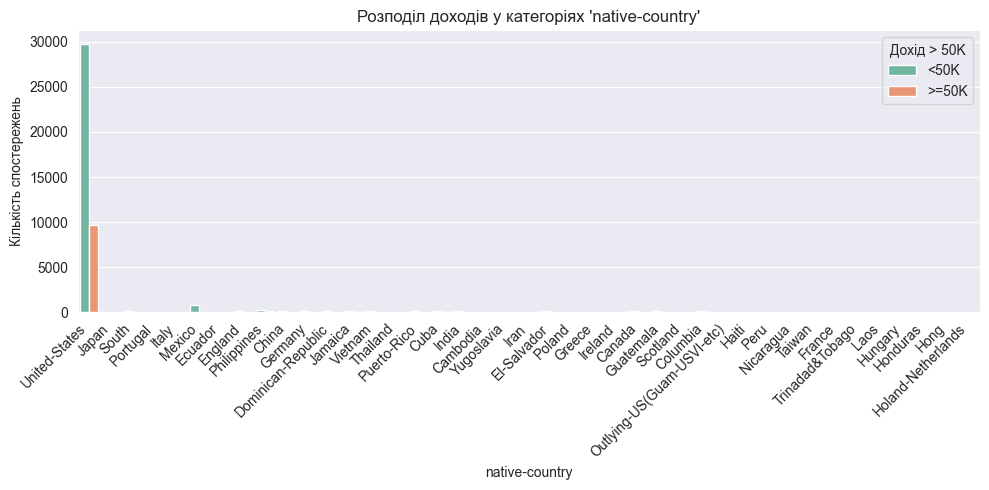

In [23]:
categorical_cols = ['workclass', 'education', 'marital-status',
                    'occupation', 'relationship', 'race',
                    'gender', 'native-country']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='income_>50K', palette='Set2')
    plt.title(f"Розподіл доходів у категоріях '{col}'")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Кількість спостережень")
    plt.xlabel(col)
    plt.legend(title="Дохід > 50K", labels=["<50K", ">=50K"])
    plt.tight_layout()
    plt.show()


In [24]:
corr_target = df[numeric_cols + ['income_>50K']].corr()['income_>50K'].sort_values(ascending=False)


In [25]:
pd.DataFrame(corr_target)

,income_>50K
income_>50K,1.000000
educational-num,0.334035
age,0.230988
hours-per-week,0.227918
capital-gain,0.223325
capital-loss,0.145250


/var/folders/p2/l72stm1945jf6ghs47v_5rd40000gn/T/ipykernel_46849/1638134833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


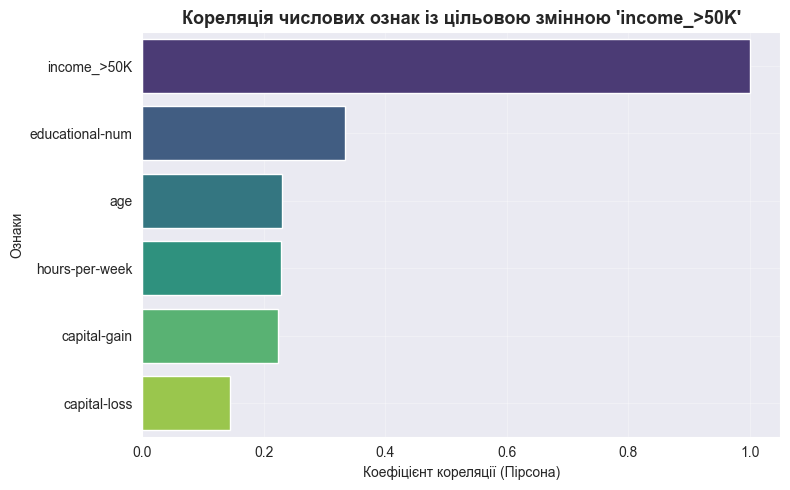

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette="viridis"
)
plt.title("Кореляція числових ознак із цільовою змінною 'income_>50K'", fontsize=13, fontweight='bold')
plt.xlabel("Коефіцієнт кореляції (Пірсона)")
plt.ylabel("Ознаки")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [28]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({
    "Кількість пропусків": missing,
    "Відсоток (%)": missing_percent
})

In [29]:
missing_table

,Кількість пропусків,Відсоток (%)
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=[
    'workclass', 'education', 'marital-status',
    'occupation', 'relationship', 'race', 'native-country'
], drop_first=True)

In [31]:
print(df.head())

   age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0   67  366425               16       1         99999             0   
1   17  244602                8       1             0             0   
2   31  174201               13       1             0             0   
3   58  110199                4       1             0             0   
4   25  149248               10       1             0             0   

   hours-per-week  income_>50K  workclass_Local-gov  workclass_Never-worked  \
0              60            1                False                   False   
1              15            0                False                   False   
2              40            1                False                   False   
3              40            0                False                   False   
4              40            0                False                   False   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                    False    

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [33]:
print(df.head)

<bound method NDFrame.head of             age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0      2.066575  366425         2.301258       1     13.064671     -0.218117   
1     -1.573960  244602        -0.805463       1     -0.144451     -0.218117   
2     -0.554610  174201         1.136237       1     -0.144451     -0.218117   
3      1.411279  110199        -2.358824       1     -0.144451     -0.218117   
4     -0.991474  149248        -0.028783       1     -0.144451     -0.218117   
...         ...     ...              ...     ...           ...           ...   
43952  0.974415   68982         1.136237       1     -0.144451     -0.218117   
43953 -1.428338  116562        -0.417123       0     -0.144451     -0.218117   
43954 -0.627421  197947        -0.028783       1     -0.144451     -0.218117   
43955  0.537551   97883         1.136237       0     -0.144451     -0.218117   
43956 -0.627421  375827        -0.417123       1     -0.144451     -0.218117   

       ho

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(f"Розмірність X_train до SMOTE: {X_train.shape}")
print(f"Розподіл класів у y_train до SMOTE:\n{y_train.value_counts(normalize=True)}")

Розмірність X_train до SMOTE: (35165, 97)
Розподіл класів у y_train до SMOTE:
income_>50K
0    0.760728
1    0.239272
Name: proportion, dtype: float64


In [37]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\n--- ПІСЛЯ SMOTE ---")
print(f"Розмірність X_train_resampled: {X_train_resampled.shape}")
print(f"Розподіл класів у y_train_resampled:\n{y_train_resampled.value_counts(normalize=True)}")

/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



--- ПІСЛЯ SMOTE ---
Розмірність X_train_resampled: (53502, 97)
Розподіл класів у y_train_resampled:
income_>50K
0    0.5
1    0.5
Name: proportion, dtype: float64


/var/folders/p2/l72stm1945jf6ghs47v_5rd40000gn/T/ipykernel_46849/2478773726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="viridis")
/var/folders/p2/l72stm1945jf6ghs47v_5rd40000gn/T/ipykernel_46849/2478773726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, ax=axes[1], palette="viridis")


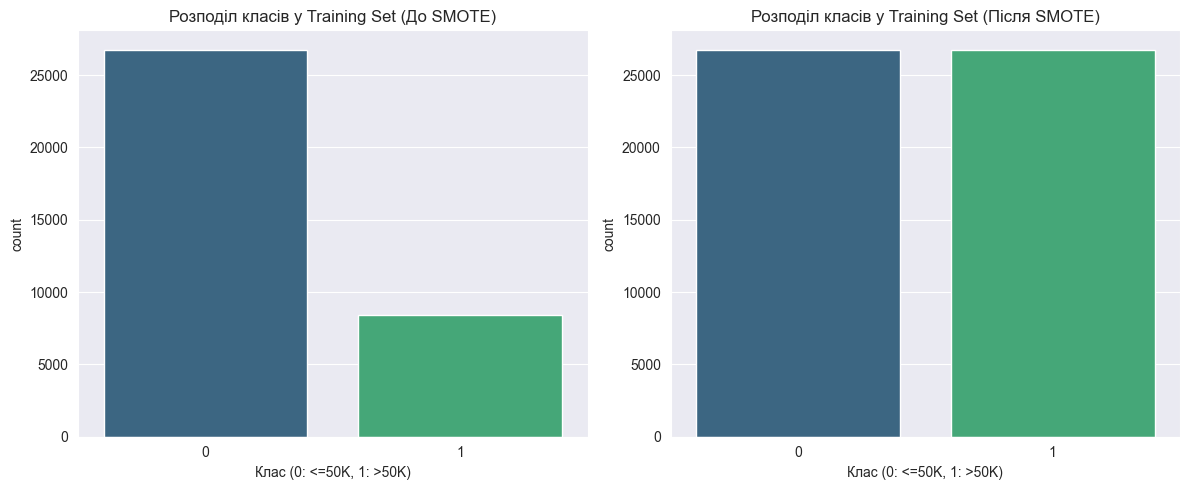

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Розподіл класів у Training Set (До SMOTE)")
axes[0].set_xlabel("Клас (0: <=50K, 1: >50K)")

sns.countplot(x=y_train_resampled, ax=axes[1], palette="viridis")
axes[1].set_title("Розподіл класів у Training Set (Після SMOTE)")
axes[1].set_xlabel("Клас (0: <=50K, 1: >50K)")

plt.tight_layout()
plt.show()

# Training

Починаємо 5-кратну крос-валідацію для кожної моделі...

Крос-валідація Logistic Regression...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Крос-валідація Random Forest...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Крос-валідація XGBoost...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Крос-валідація LightGBM...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Крос-валідація CatBoost...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be


Крос-валідацію завершено.

=== CV ТАБЛИЦЯ 1: СЕРЕДНІ МЕТРИКИ ДЛЯ ЦІЛЬОВОГО КЛАСУ (Target Class 1) ===
 Model ROC-AUC Accuracy Precision (1) Recall (1) F1 (1)
0 CatBoost 0.9254 0.8699 0.7607 0.6657 0.7100
1 XGBoost 0.9249 0.8694 0.7586 0.6660 0.7093
2 LightGBM 0.9232 0.8688 0.7604 0.6599 0.7065
3 Random Forest 0.8983 0.8481 0.7002 0.6386 0.6679
4 Logistic Regression 0.8932 0.8396 0.6623 0.6729 0.6675



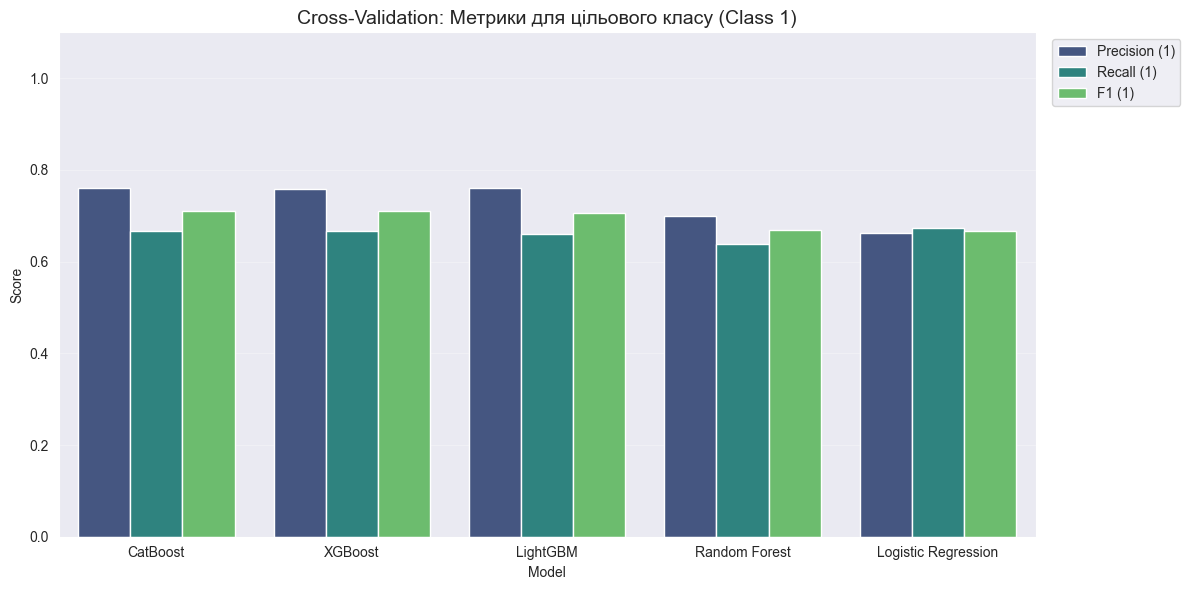


=== CV ТАБЛИЦЯ 2: СЕРЕДНІ ЗВАЖЕНІ МЕТРИКИ (Weighted Average) ===
 Model ROC-AUC Accuracy Precision (W) Recall (W) F1 (W)
0 CatBoost 0.9254 0.8699 0.8658 0.8699 0.8668
1 XGBoost 0.9249 0.8694 0.8653 0.8694 0.8663
2 LightGBM 0.9232 0.8688 0.8645 0.8688 0.8655
3 Random Forest 0.8983 0.8481 0.8441 0.8481 0.8456
4 Logistic Regression 0.8932 0.8396 0.8405 0.8396 0.8401



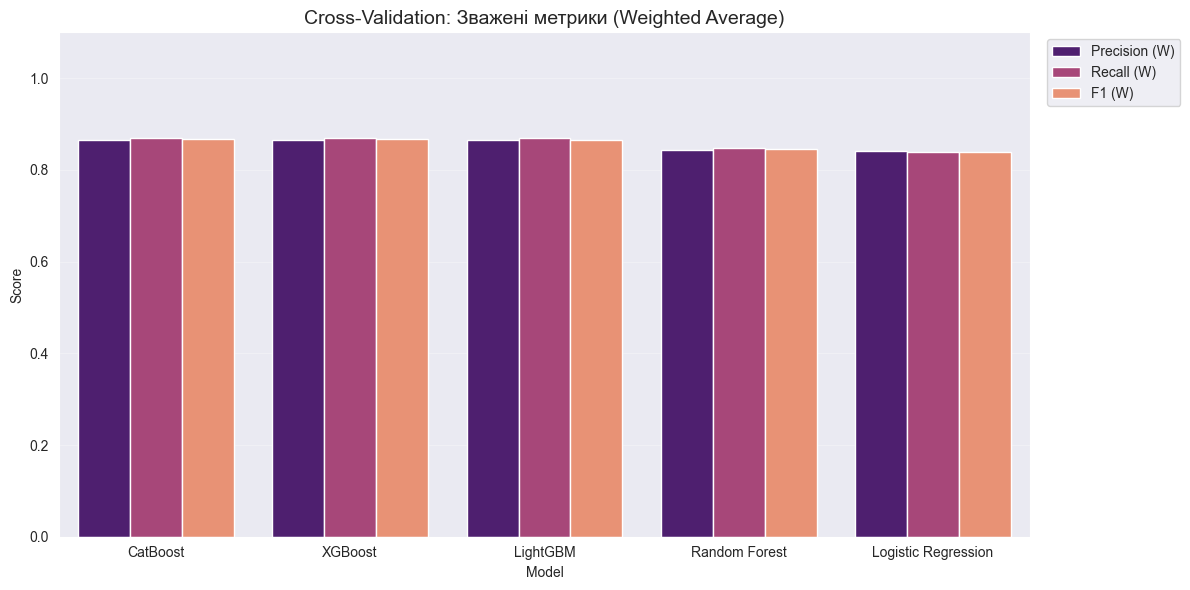

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

scoring_metrics = {
    'roc_auc': 'roc_auc',
    'accuracy': 'accuracy',
    
    'prec_1': 'precision',
    'rec_1': 'recall',
    'f1_1': 'f1',
    
    'prec_w': 'precision_weighted',
    'rec_w': 'recall_weighted',
    'f1_w': 'f1_weighted'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results_list = []

print("Починаємо 5-кратну крос-валідацію для кожної моделі...\n")

for name, model in models.items():
    print(f"Крос-валідація {name}...")
    
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    cv_scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring_metrics, n_jobs=-1)
    
    cv_results_list.append({
        "Model": name,
        "ROC-AUC": np.mean(cv_scores['test_roc_auc']),
        "Accuracy": np.mean(cv_scores['test_accuracy']),
        "Precision (1)": np.mean(cv_scores['test_prec_1']),
        "Recall (1)": np.mean(cv_scores['test_rec_1']),
        "F1 (1)": np.mean(cv_scores['test_f1_1']),
        "Precision (W)": np.mean(cv_scores['test_prec_w']),
        "Recall (W)": np.mean(cv_scores['test_rec_w']),
        "F1 (W)": np.mean(cv_scores['test_f1_w'])
    })

print("\nКрос-валідацію завершено.")

df_cv_results = pd.DataFrame(cv_results_list)

cols_class1 = ["Model", "ROC-AUC", "Accuracy", "Precision (1)", "Recall (1)", "F1 (1)"]
df_cv_class1 = df_cv_results[cols_class1].sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

print("\n=== CV ТАБЛИЦЯ 1: СЕРЕДНІ МЕТРИКИ ДЛЯ ЦІЛЬОВОГО КЛАСУ (Target Class 1) ===")
print(df_cv_class1.style.format("{:.4f}", subset=cols_class1[1:]).to_string())

plt.figure(figsize=(12, 6))
plot_df1 = df_cv_class1.melt(id_vars="Model", value_vars=["Precision (1)", "Recall (1)", "F1 (1)"], 
                             var_name="Metric", value_name="Score")
sns.barplot(data=plot_df1, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Cross-Validation: Метрики для цільового класу (Class 1)", fontsize=14)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

cols_weighted = ["Model", "ROC-AUC", "Accuracy", "Precision (W)", "Recall (W)", "F1 (W)"]
df_cv_weighted = df_cv_results[cols_weighted].sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

print("\n=== CV ТАБЛИЦЯ 2: СЕРЕДНІ ЗВАЖЕНІ МЕТРИКИ (Weighted Average) ===")
print(df_cv_weighted.style.format("{:.4f}", subset=cols_weighted[1:]).to_string())

plt.figure(figsize=(12, 6))
plot_df2 = df_cv_weighted.melt(id_vars="Model", value_vars=["Precision (W)", "Recall (W)", "F1 (W)"], 
                               var_name="Metric", value_name="Score")
sns.barplot(data=plot_df2, x="Model", y="Score", hue="Metric", palette="magma")
plt.title("Cross-Validation: Зважені метрики (Weighted Average)", fontsize=14)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Генерація 'зшитих' прогнозів через cross_val_predict...
Обробка Logistic Regression...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Обробка Random Forest...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Обробка XGBoost...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Обробка LightGBM...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Обробка CatBoost...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Дані для візуалізації готові.



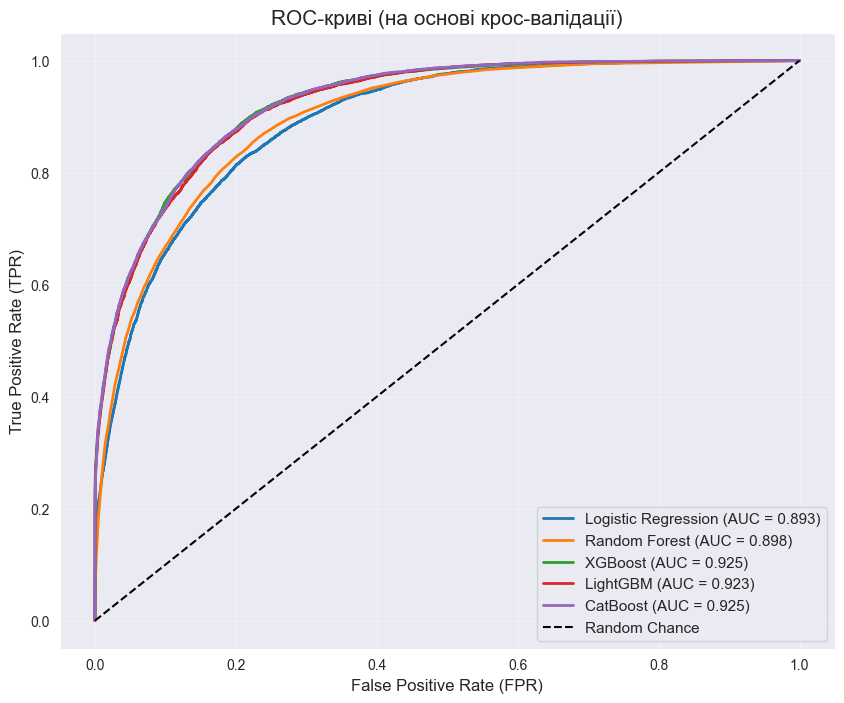

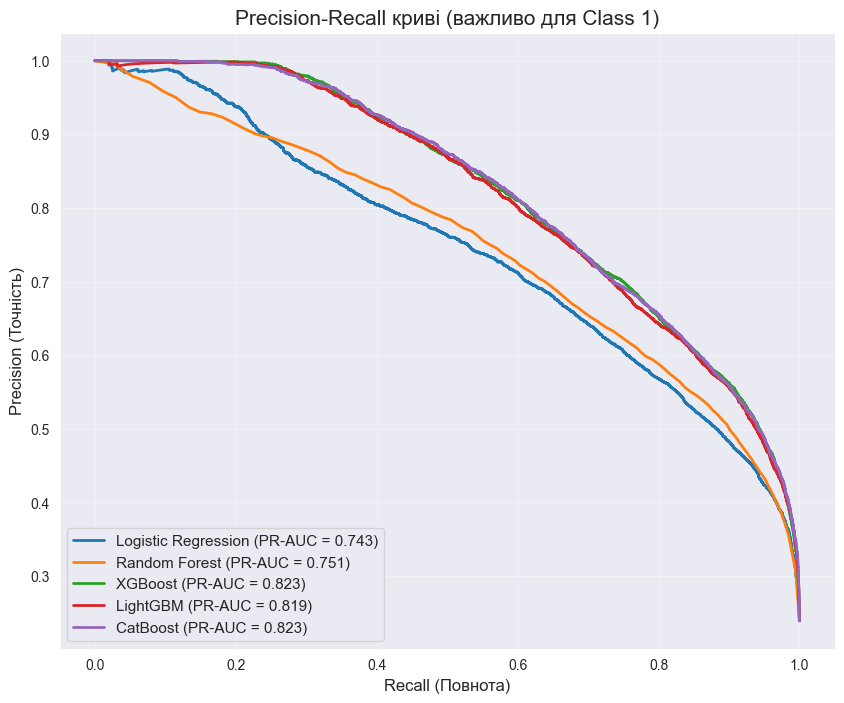

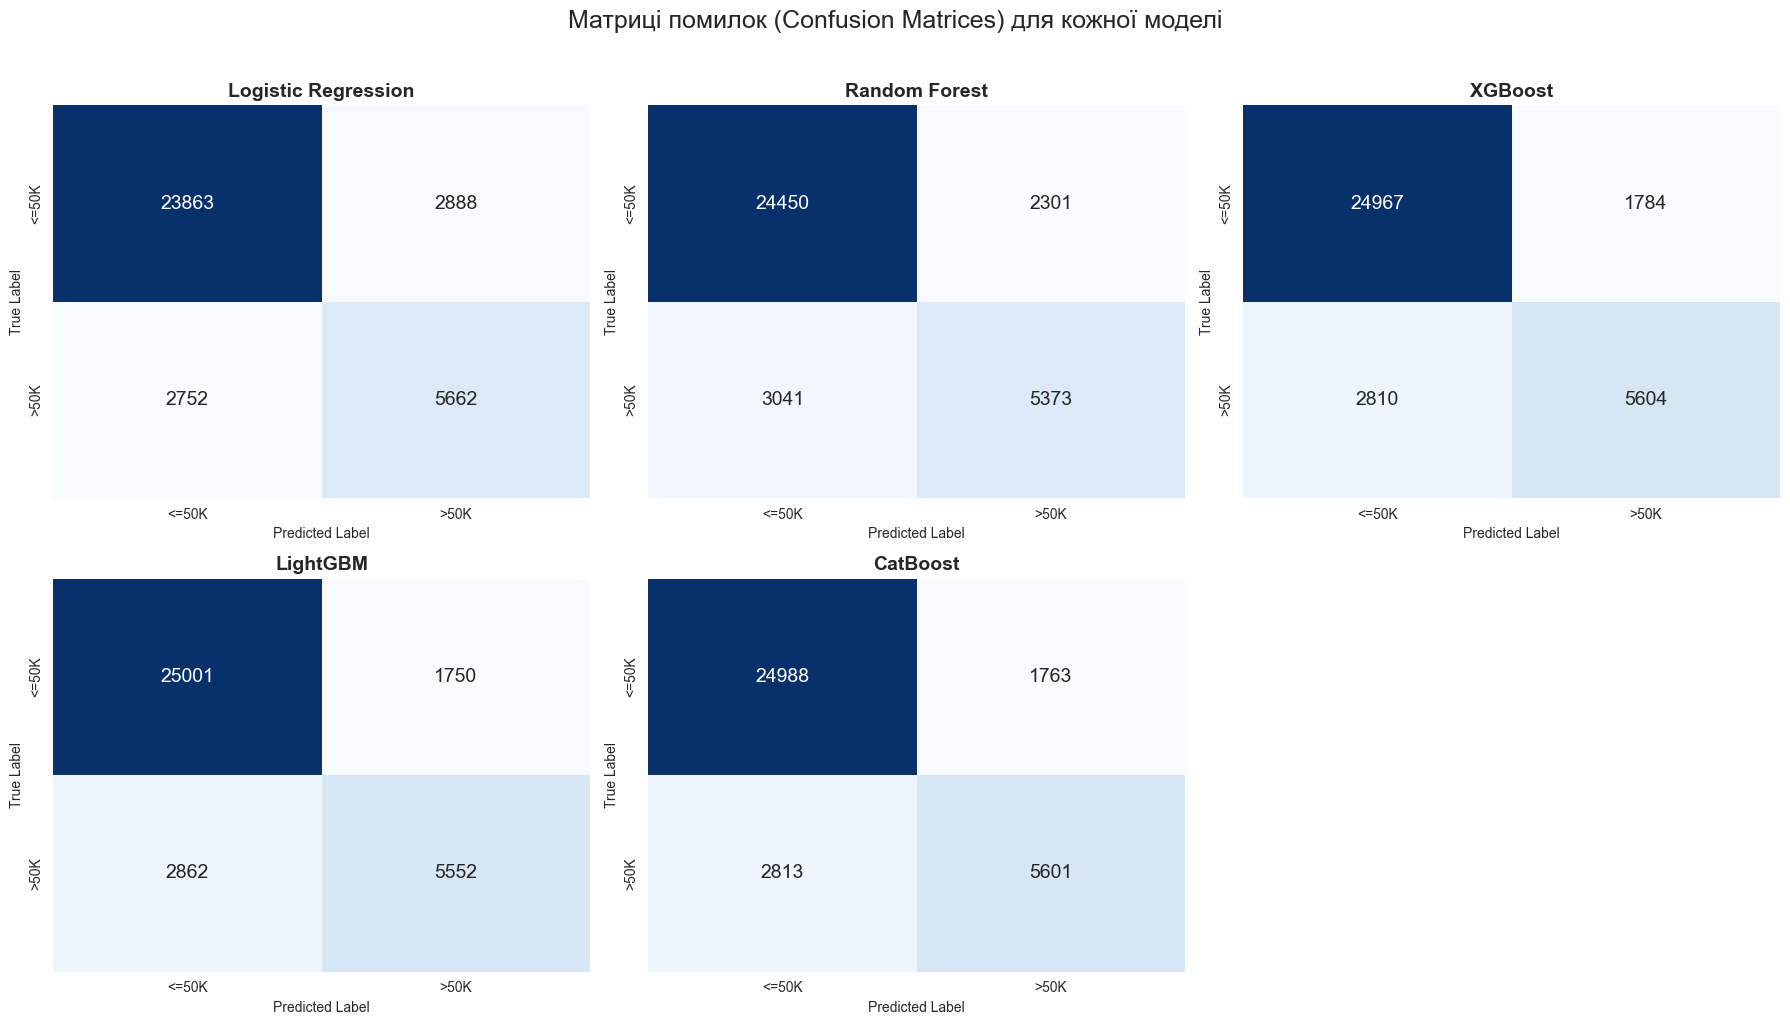

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score

# Словники для збереження результатів усіх моделей
predictions_data = {}

print("Генерація 'зшитих' прогнозів через cross_val_predict...")

# 1. Генерація прогнозів для всіх моделей
for name, model in models.items():
    print(f"Обробка {name}...")
    
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    # Отримуємо ймовірності (для ROC/PR кривих)
    # method='predict_proba' повертає ймовірності для кожного класу
    y_probas = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
    
    # Отримуємо чіткі класи (для Confusion Matrix)
    y_preds = cross_val_predict(pipeline, X_train, y_train, cv=cv, n_jobs=-1)
    
    predictions_data[name] = {
        'probas': y_probas,
        'preds': y_preds
    }

print("Дані для візуалізації готові.\n")

# --- ВІЗУАЛІЗАЦІЯ 1: ROC Curves (Порівняння) ---
plt.figure(figsize=(10, 8))

for name, data in predictions_data.items():
    fpr, tpr, _ = roc_curve(y_train, data['probas'])
    roc_auc = roc_auc_score(y_train, data['probas'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title("ROC-криві (на основі крос-валідації)", fontsize=15)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

# --- ВІЗУАЛІЗАЦІЯ 2: Precision-Recall Curves (Для незбалансованих даних) ---
plt.figure(figsize=(10, 8))

for name, data in predictions_data.items():
    precision, recall, _ = precision_recall_curve(y_train, data['probas'])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR-AUC = {pr_auc:.3f})", linewidth=2)

plt.title("Precision-Recall криві (важливо для Class 1)", fontsize=15)
plt.xlabel("Recall (Повнота)", fontsize=12)
plt.ylabel("Precision (Точність)", fontsize=12)
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

# --- ВІЗУАЛІЗАЦІЯ 3: Confusion Matrices (Сітка) ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() # Робимо плоский список осей для зручності

for i, (name, data) in enumerate(predictions_data.items()):
    cm = confusion_matrix(y_train, data['preds'])
    
    # Малюємо теплову карту
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 14})
    
    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
    axes[i].set_xticklabels(['<=50K', '>50K'])
    axes[i].set_yticklabels(['<=50K', '>50K'])

# Прибираємо зайвий пустий графік (якщо моделей 5, а місць 6)
if len(models) < 6:
    fig.delaxes(axes[5])

plt.suptitle("Матриці помилок (Confusion Matrices) для кожної моделі", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [41]:
df_cv_class1

,Model,ROC-AUC,Accuracy,Precision (1),Recall (1),F1 (1)
0,CatBoost,0.925379,0.869871,0.760707,0.665676,0.709983
1,XGBoost,0.924921,0.869359,0.758591,0.666033,0.709276
2,LightGBM,0.923160,0.868847,0.760379,0.659853,0.706546
3,Random Forest,0.898292,0.848088,0.700223,0.638580,0.667925
4,Logistic Regression,0.893172,0.839613,0.662341,0.672926,0.667549


In [42]:
df_cv_weighted

,Model,ROC-AUC,Accuracy,Precision (W),Recall (W),F1 (W)
0,CatBoost,0.925379,0.869871,0.865773,0.869871,0.866793
1,XGBoost,0.924921,0.869359,0.865282,0.869359,0.866345
2,LightGBM,0.923160,0.868847,0.864526,0.868847,0.865543
3,Random Forest,0.898292,0.848088,0.844129,0.848088,0.845623
4,Logistic Regression,0.893172,0.839613,0.840550,0.839613,0.840052


Запуск ручного циклу крос-валідації (найнадійніший метод)...

Обробка моделі: Logistic Regression...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/py

Обробка моделі: Random Forest...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Обробка моделі: XGBoost...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:08:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warni

Обробка моделі: LightGBM...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be

Обробка моделі: CatBoost...


/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/damiantchuma/coding/Ai/Trading_bookmap/Trading_bookmap/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function be


Дані згенеровано успішно.

=== РЕЗУЛЬТАТИ ПРИ ПОРОЗІ 0.3 ===


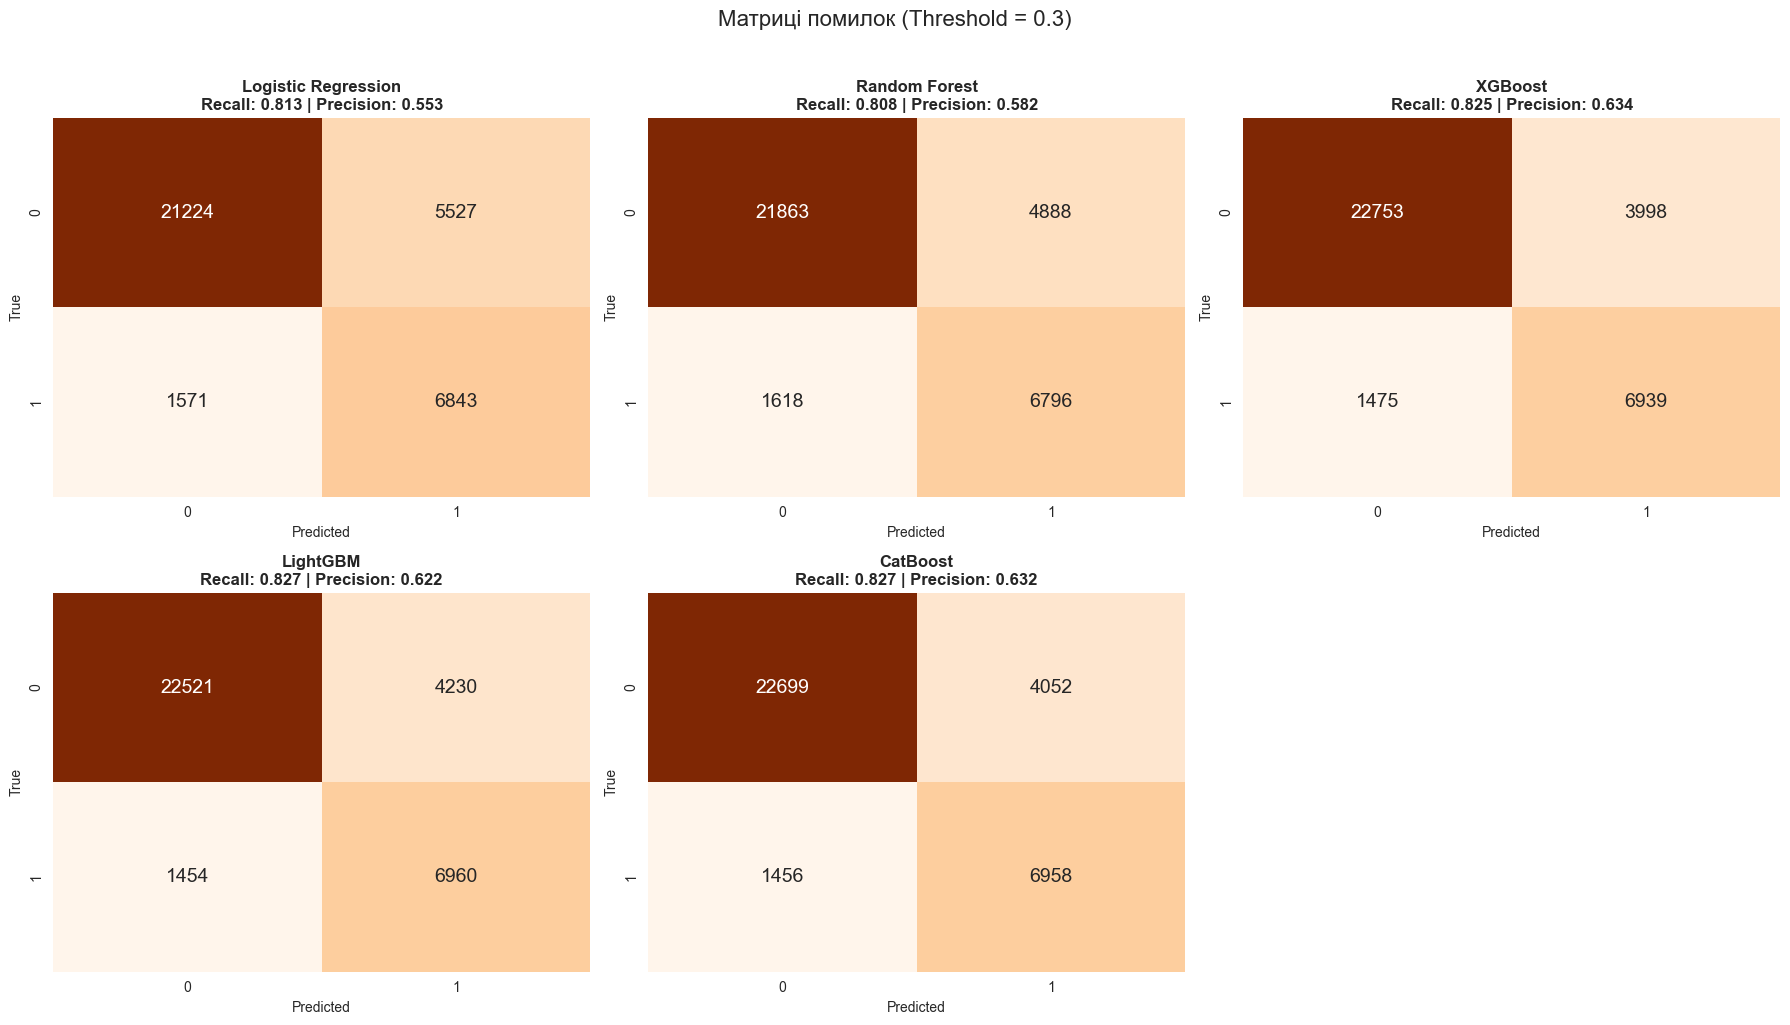


=== ПОРІВНЯЛЬНА ТАБЛИЦЯ (Агресивна стратегія) ===
              Model  Threshold  Accuracy  Precision  Recall     F1
           LightGBM     0.3000    0.8384     0.6220  0.8272 0.7101
           CatBoost     0.3000    0.8434     0.6320  0.8270 0.7164
            XGBoost     0.3000    0.8444     0.6345  0.8247 0.7172
Logistic Regression     0.3000    0.7982     0.5532  0.8133 0.6585
      Random Forest     0.3000    0.8150     0.5817  0.8077 0.6763


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# --- 1. ПІДГОТОВКА ---
# (Тут твої models, X_train, y_train мають бути вже визначені)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Словник для збереження "чистих" результатів
predictions_data = {}

print("Запуск ручного циклу крос-валідації (найнадійніший метод)...\n")

for name, model in models.items():
    print(f"Обробка моделі: {name}...")

    # Списки для накопичення результатів з усіх фолдів
    y_true_all = []
    y_proba_all = []

    # Ручний прохід по фолдах
    for train_idx, val_idx in cv.split(X_train, y_train):
        # Виділяємо дані за індексами
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Створюємо та навчаємо пайплайн
        pipeline = ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('model', model)
        ])
        pipeline.fit(X_fold_train, y_fold_train)

        # Робимо прогноз ймовірностей для валідаційної частини
        probas = pipeline.predict_proba(X_fold_val)[:, 1]

        # Зберігаємо реальні значення та прогнози
        y_true_all.extend(y_fold_val)
        y_proba_all.extend(probas)

    # Зберігаємо в загальний словник як numpy масиви
    predictions_data[name] = {
        'y_true': np.array(y_true_all),
        'probas': np.array(y_proba_all)
    }

print("\nДані згенеровано успішно.")

# --- 2. АНАЛІЗ ЗІ ЗНИЖЕНИМ ПОРОГОМ (Threshold Tuning) ---

NEW_THRESHOLD = 0.3  # Агресивна стратегія
print(f"\n=== РЕЗУЛЬТАТИ ПРИ ПОРОЗІ {NEW_THRESHOLD} ===")

threshold_results = []
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, data) in enumerate(predictions_data.items()):
    y_true = data['y_true']
    y_proba = data['probas']

    # Застосовуємо поріг вручну
    y_pred_new = (y_proba >= NEW_THRESHOLD).astype(int)

    # Рахуємо метрики
    rec = recall_score(y_true, y_pred_new)
    prec = precision_score(y_true, y_pred_new)
    f1 = f1_score(y_true, y_pred_new)
    acc = accuracy_score(y_true, y_pred_new)

    threshold_results.append({
        "Model": name,
        "Threshold": NEW_THRESHOLD,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

    # Малюємо матрицю
    cm = confusion_matrix(y_true, y_pred_new)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[i], cbar=False, annot_kws={"size": 14})
    axes[i].set_title(f"{name}\nRecall: {rec:.3f} | Precision: {prec:.3f}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

if len(models) < 6:
    fig.delaxes(axes[5])

plt.suptitle(f"Матриці помилок (Threshold = {NEW_THRESHOLD})", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Виводимо таблицю (використовуємо .to_string() щоб уникнути помилки стилів)
df_thresh = pd.DataFrame(threshold_results).sort_values(by="Recall", ascending=False)
print("\n=== ПОРІВНЯЛЬНА ТАБЛИЦЯ (Агресивна стратегія) ===")
print(df_thresh.to_string(index=False, float_format="{:.4f}".format))

=== АНАЛІЗ ЧУТЛИВОСТІ (SENSITIVITY ANALYSIS) ===

Опрацьовано Threshold = 0.30
Опрацьовано Threshold = 0.40
Опрацьовано Threshold = 0.43
Опрацьовано Threshold = 0.46
Опрацьовано Threshold = 0.50
Опрацьовано Threshold = 0.60
Опрацьовано Threshold = 0.70

Всі таблиці збережено в змінну 'tables_dict'.


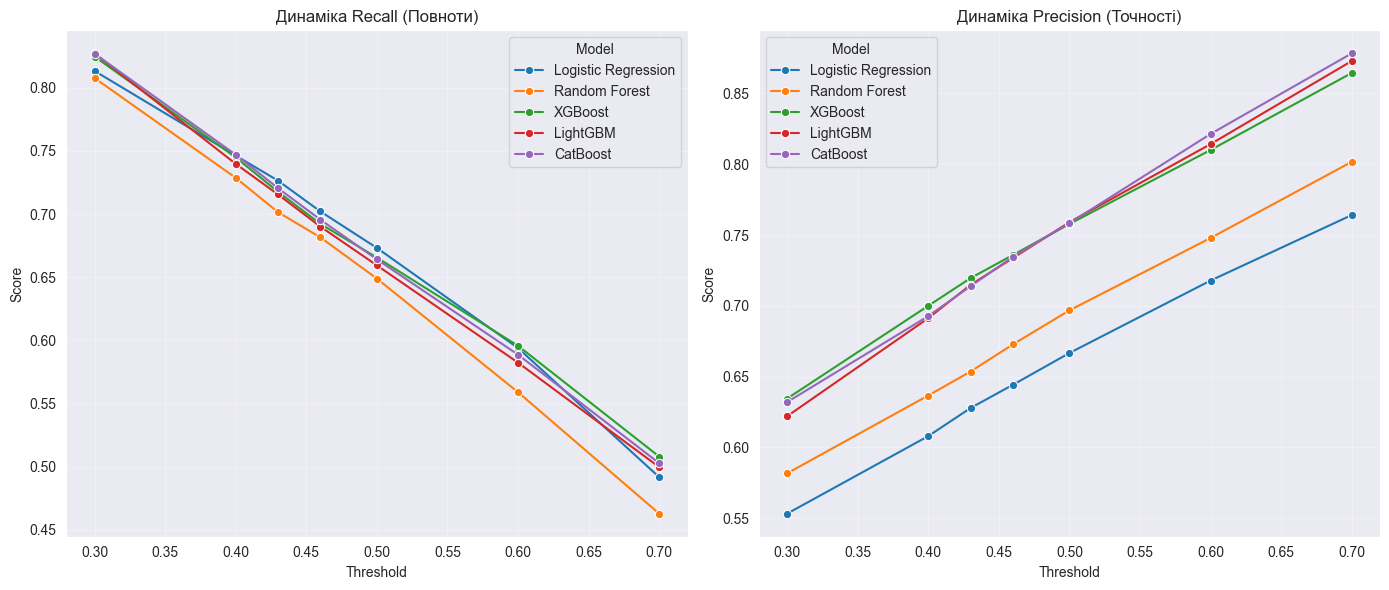

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Список порогів
thresholds = [0.3, 0.4, 0.43, 0.46, 0.5, 0.6, 0.7]

# 1. Словник для збереження готових таблиць (DataFrame)
tables_dict = {}

# Список для історії (для графіків)
all_results_history = []

print("=== АНАЛІЗ ЧУТЛИВОСТІ (SENSITIVITY ANALYSIS) ===\n")

for t in thresholds:
    current_threshold_results = []

    for name, data in predictions_data.items():
        y_true = data['y_true']
        y_probas = data['probas']

        # Застосування порогу
        y_pred_t = (y_probas >= t).astype(int)

        # Метрики
        rec = recall_score(y_true, y_pred_t)
        prec = precision_score(y_true, y_pred_t)
        f1 = f1_score(y_true, y_pred_t)
        acc = accuracy_score(y_true, y_pred_t)

        # Додаємо в список для поточної таблиці
        current_threshold_results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1
        })

        # Додаємо в загальну історію для графіків
        all_results_history.append({"Model": name, "Threshold": t, "Metric": "Recall", "Score": rec})
        all_results_history.append({"Model": name, "Threshold": t, "Metric": "Precision", "Score": prec})

    # Створюємо DataFrame для поточного порогу
    df_curr = pd.DataFrame(current_threshold_results).sort_values(by="Recall", ascending=False)

    # 2. ЗБЕРІГАЄМО ТАБЛИЦЮ У СЛОВНИК
    tables_dict[t] = df_curr

    # Виводимо в консоль, щоб бачити процес
    print(f"Опрацьовано Threshold = {t:.2f}")

print("\nВсі таблиці збережено в змінну 'tables_dict'.")

# --- ВІЗУАЛІЗАЦІЯ (Залишаємо, бо це важливо для висновків) ---
df_history = pd.DataFrame(all_results_history)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_history[df_history['Metric'] == 'Recall'], x="Threshold", y="Score", hue="Model", marker="o")
plt.title("Динаміка Recall (Повноти)")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_history[df_history['Metric'] == 'Precision'], x="Threshold", y="Score", hue="Model", marker="o")
plt.title("Динаміка Precision (Точності)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ВІЗУАЛІЗАЦІЯ МАТРИЦЬ ПОМИЛОК ДЛЯ РІЗНИХ ПОРОГІВ ===

Generating charts for Threshold = 0.3...


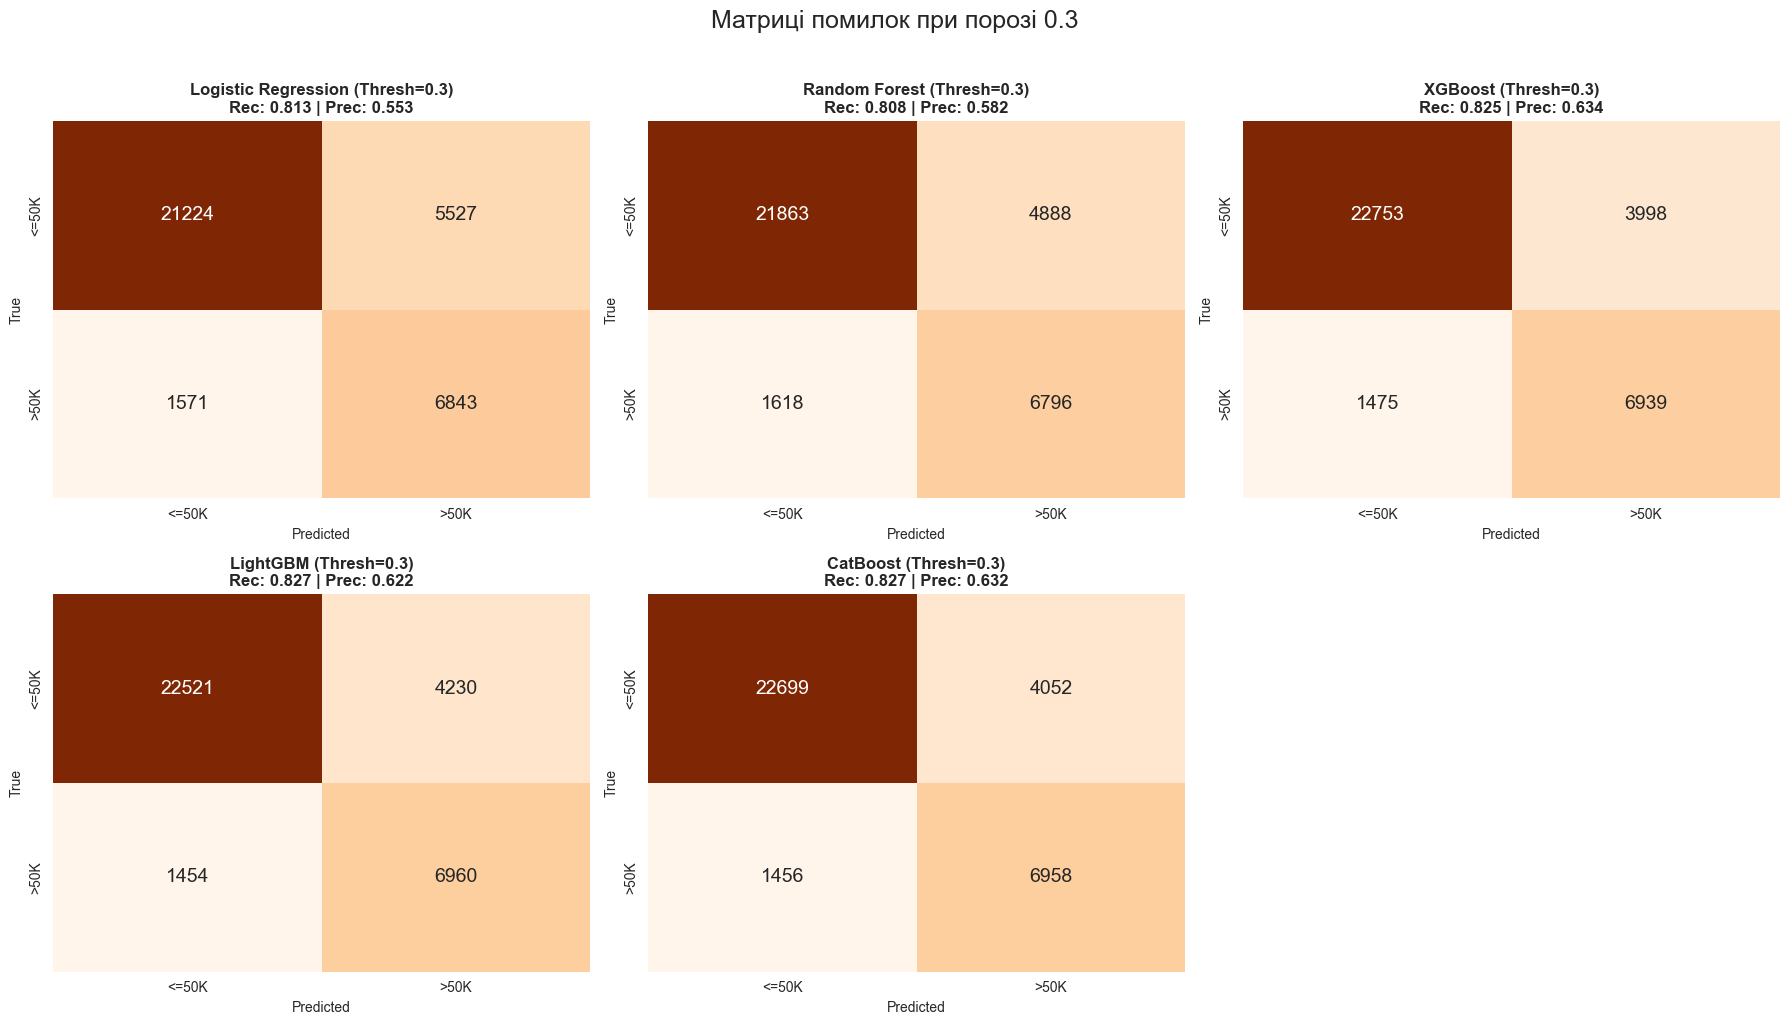

----------------------------------------------------------------------------------------------------

Generating charts for Threshold = 0.4...


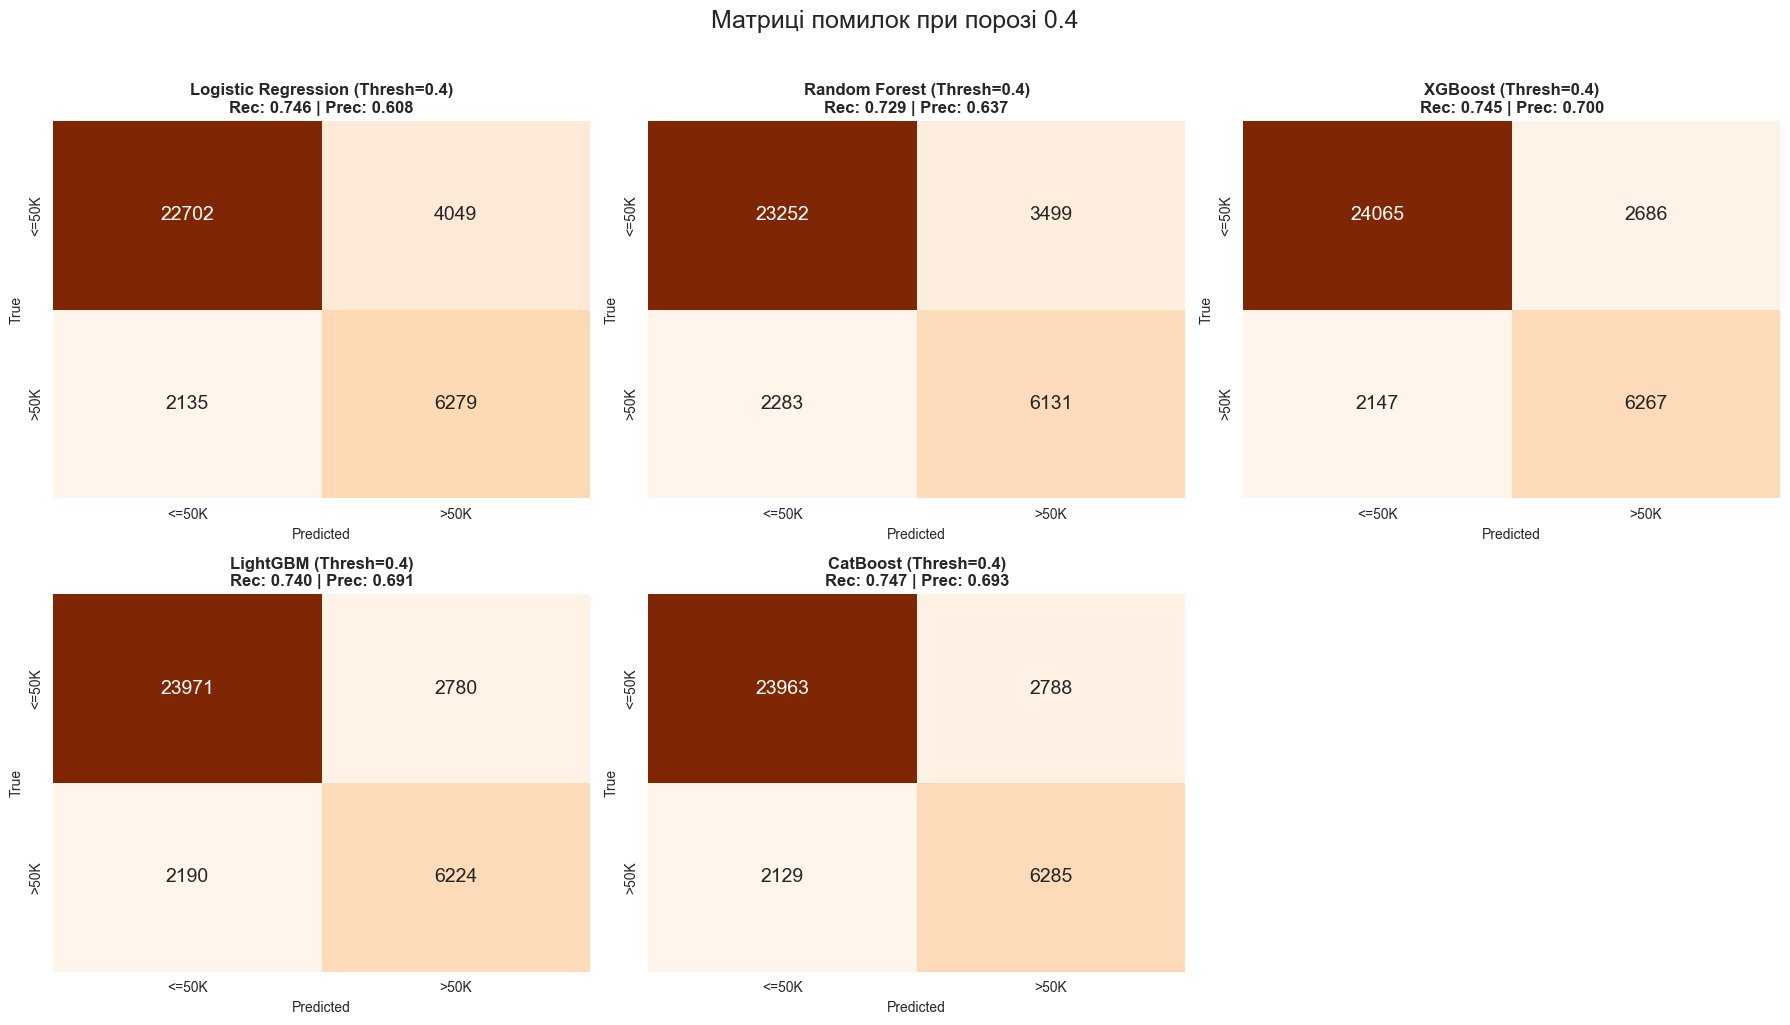

----------------------------------------------------------------------------------------------------

Generating charts for Threshold = 0.43...


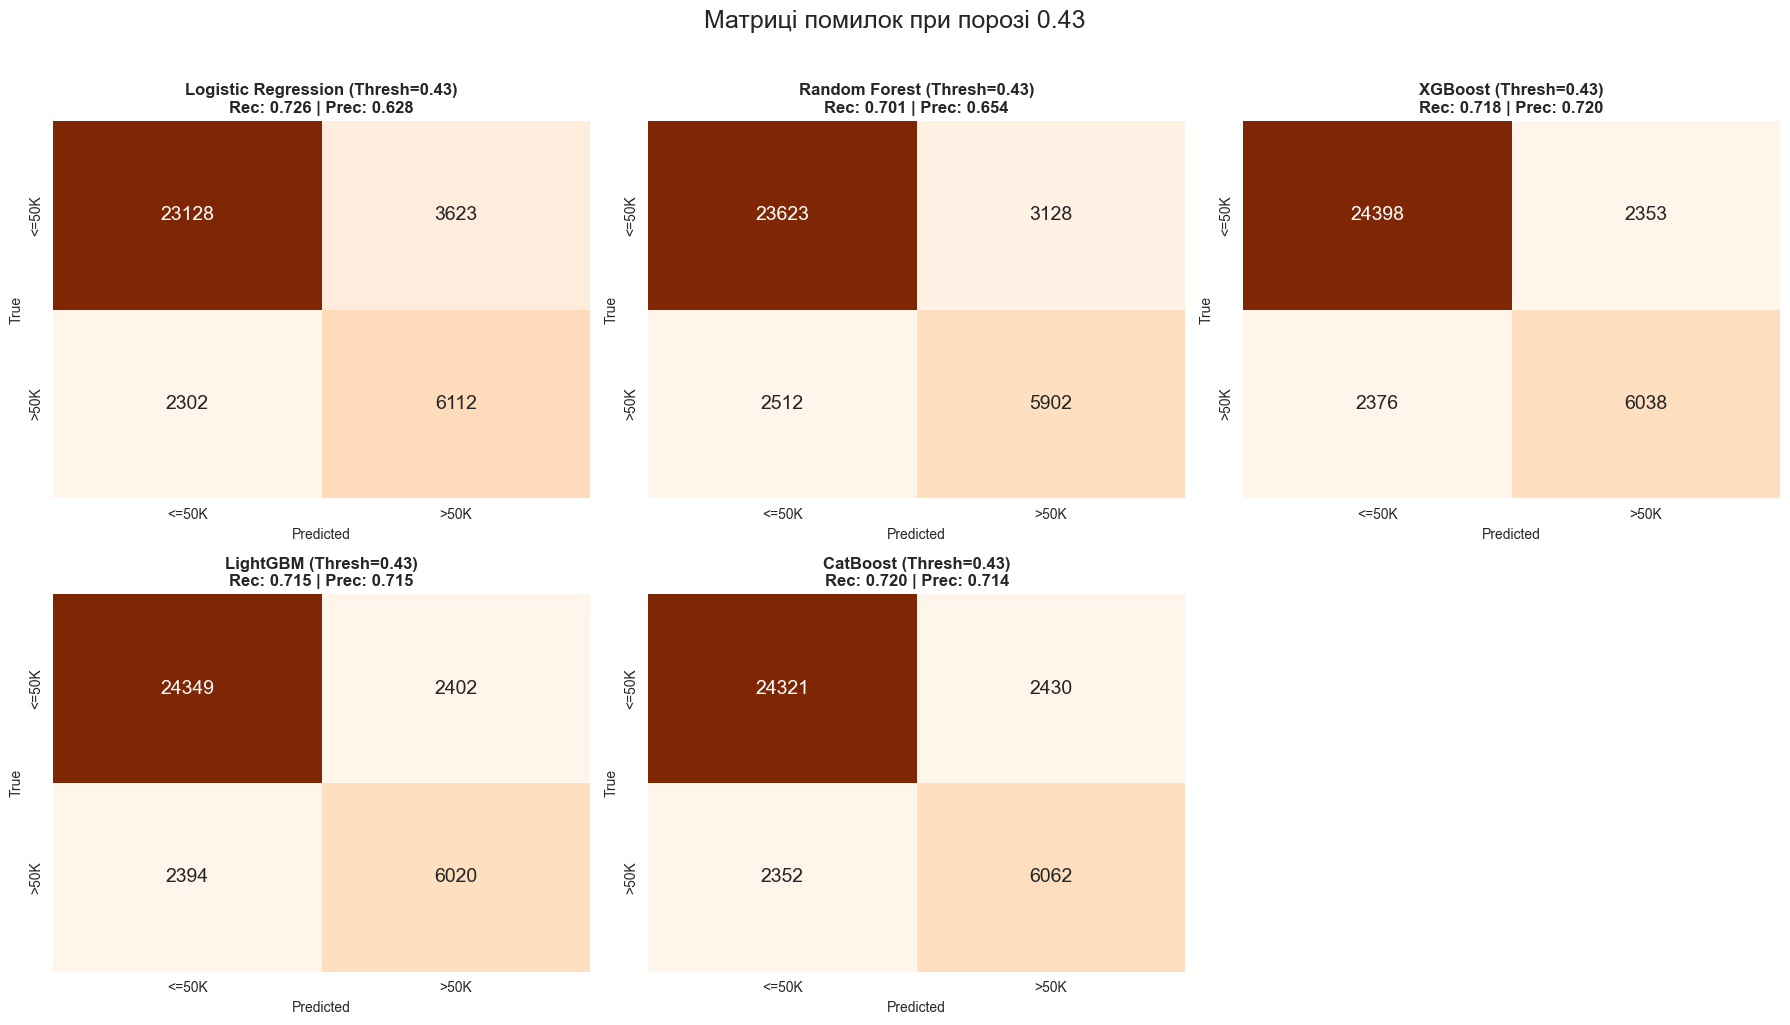

----------------------------------------------------------------------------------------------------

Generating charts for Threshold = 0.46...


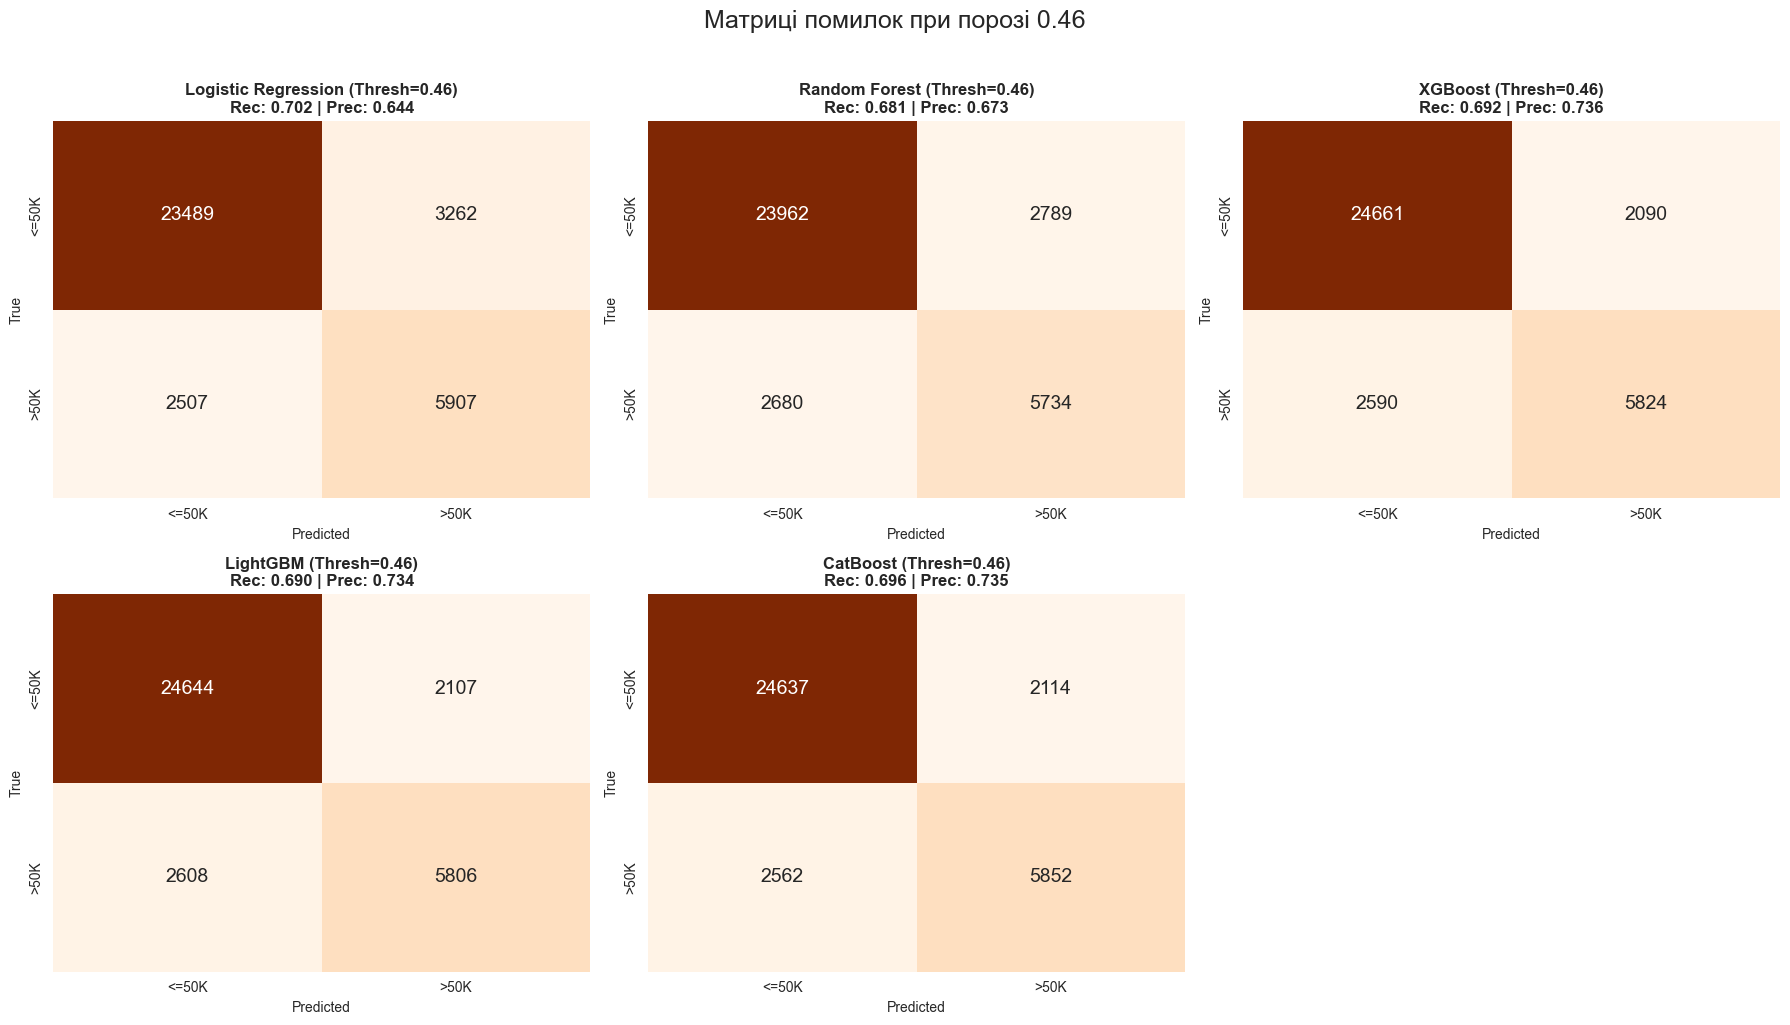

----------------------------------------------------------------------------------------------------

Generating charts for Threshold = 0.5...


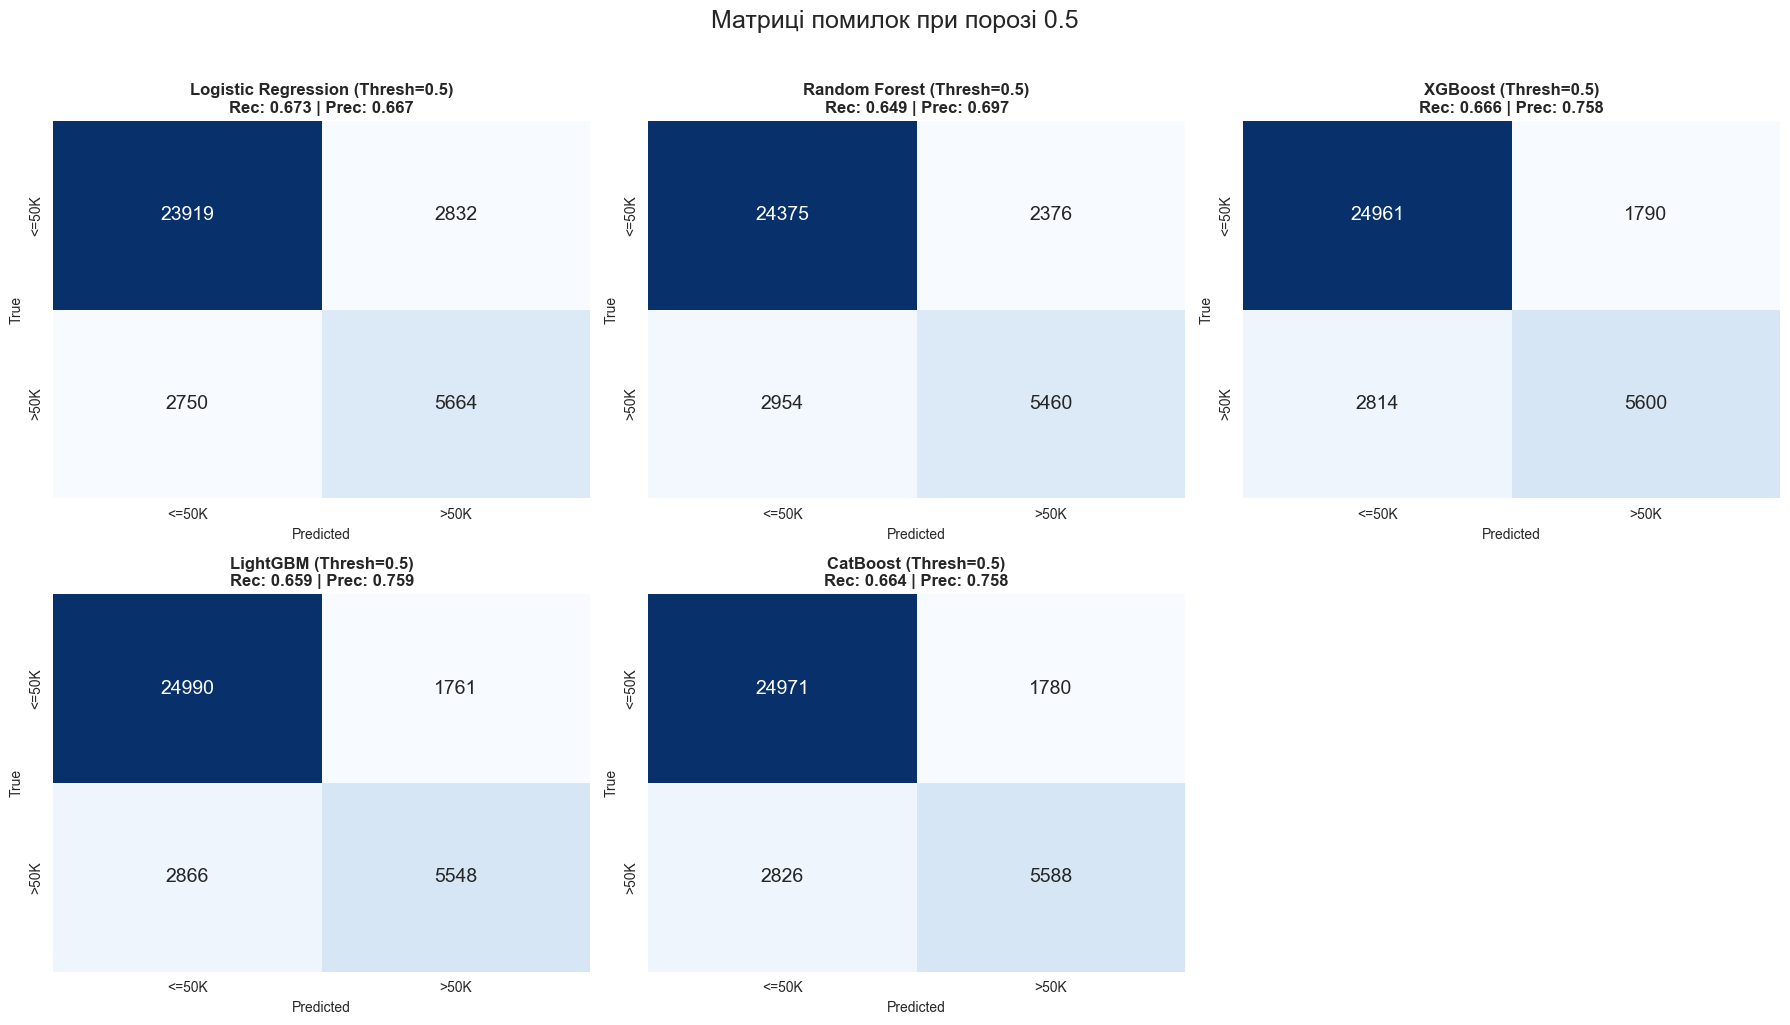

----------------------------------------------------------------------------------------------------

Generating charts for Threshold = 0.6...


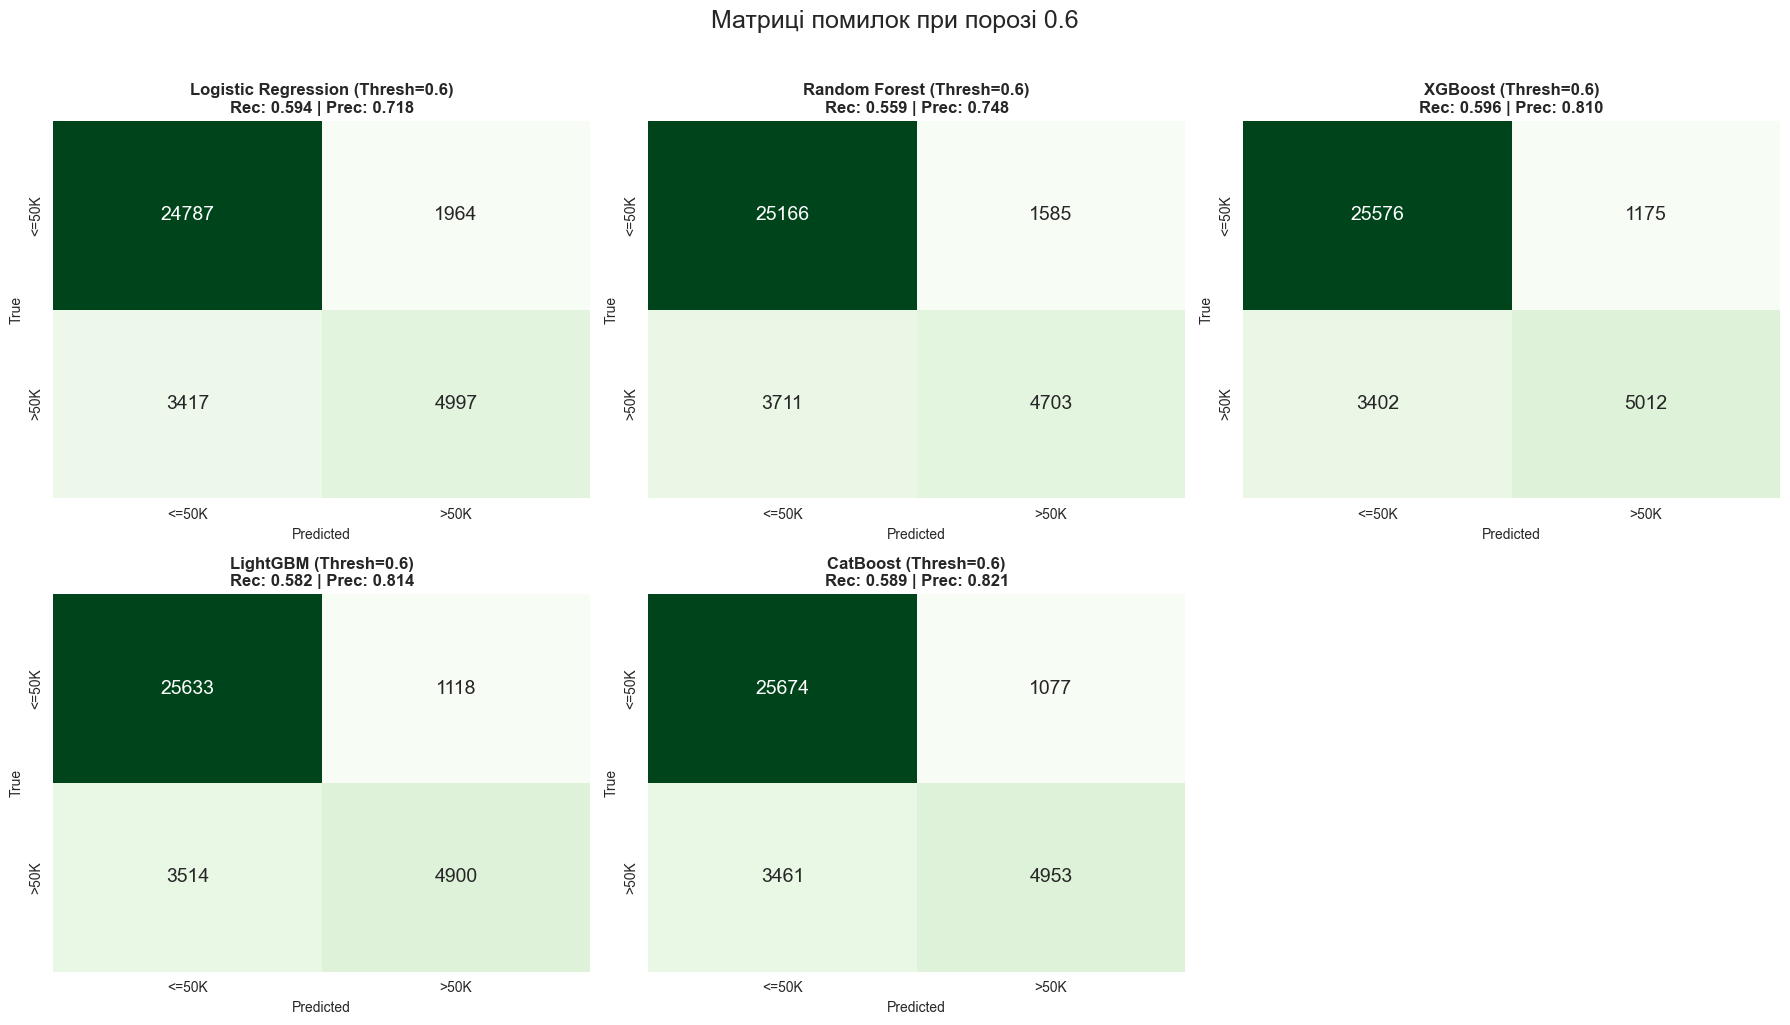

----------------------------------------------------------------------------------------------------

Generating charts for Threshold = 0.7...


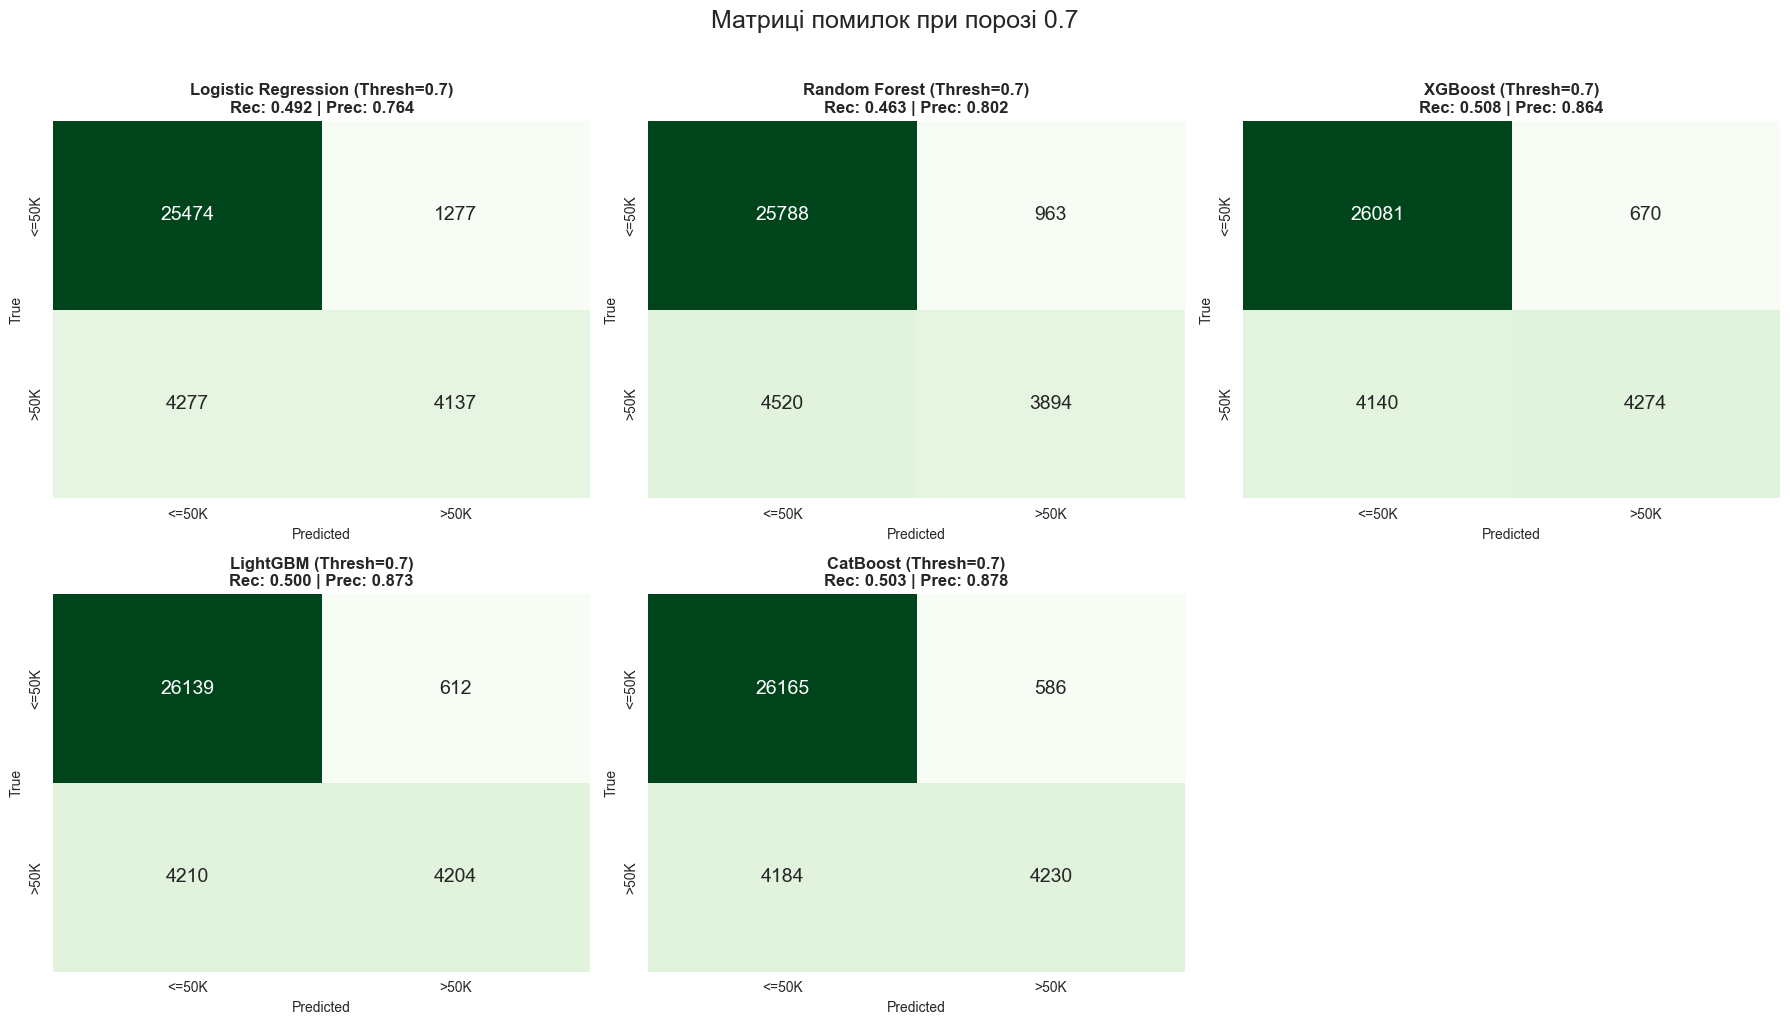

----------------------------------------------------------------------------------------------------



In [45]:
from sklearn.metrics import confusion_matrix

# Використовуємо той самий список порогів
# thresholds = [0.3, 0.4, 0.43, 0.46, 0.5, 0.6, 0.7] (вже визначено у вашому коді)

print("=== ВІЗУАЛІЗАЦІЯ МАТРИЦЬ ПОМИЛОК ДЛЯ РІЗНИХ ПОРОГІВ ===\n")

for t in thresholds:
    print(f"Generating charts for Threshold = {t}...")
    
    # Створюємо сітку графіків для поточного порогу
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, (name, data) in enumerate(predictions_data.items()):
        y_true = data['y_true']
        y_probas = data['probas']
        
        # Застосовуємо поріг
        y_pred_t = (y_probas >= t).astype(int)
        
        # Рахуємо матрицю
        cm = confusion_matrix(y_true, y_pred_t)
        
        # Рахуємо Recall та Precision для заголовка (щоб зразу бачити цифри)
        rec = recall_score(y_true, y_pred_t)
        prec = precision_score(y_true, y_pred_t)
        
        # Малюємо
        # Використовуємо різні палітри: 
        # Ближче до 0.3 (агресивні) - теплі (Oranges), 
        # Ближче до 0.5 - сині (Blues), 
        # Ближче до 0.7 (обережні) - зелені (Greens)
        if t < 0.5:
            cmap = 'Oranges'
        elif t == 0.5:
            cmap = 'Blues'
        else:
            cmap = 'Greens'
            
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[i], cbar=False, annot_kws={"size": 14})
        
        axes[i].set_title(f"{name} (Thresh={t})\nRec: {rec:.3f} | Prec: {prec:.3f}", fontsize=12, fontweight='bold')
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("True")
        axes[i].set_xticklabels(['<=50K', '>50K'])
        axes[i].set_yticklabels(['<=50K', '>50K'])

    # Прибираємо зайвий графік, якщо моделей менше 6
    if len(predictions_data) < 6:
        for j in range(len(predictions_data), 6):
            fig.delaxes(axes[j])

    plt.suptitle(f"Матриці помилок при порозі {t}", fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()
    print("-" * 100 + "\n")

In [46]:
tables_dict[0.3]

,Model,Accuracy,Precision,Recall,F1
3,LightGBM,0.838362,0.621984,0.827193,0.710059
4,CatBoost,0.843367,0.631971,0.826955,0.716433
2,XGBoost,0.844362,0.634452,0.824697,0.717172
0,Logistic Regression,0.798152,0.553193,0.813287,0.658487
1,Random Forest,0.814986,0.581650,0.807701,0.676286


In [47]:
tables_dict[0.4]

,Model,Accuracy,Precision,Recall,F1
4,CatBoost,0.860173,0.692715,0.746969,0.718820
0,Logistic Regression,0.824143,0.607959,0.746256,0.670046
2,XGBoost,0.862562,0.699989,0.744830,0.721714
3,LightGBM,0.858666,0.691248,0.739720,0.714663
1,Random Forest,0.835575,0.636656,0.728667,0.679561


In [48]:
tables_dict[0.43]

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.831509,0.627838,0.726408,0.673536
4,CatBoost,0.864013,0.713848,0.720466,0.717142
2,XGBoost,0.865520,0.719581,0.717614,0.718596
3,LightGBM,0.863614,0.714795,0.715474,0.715134
1,Random Forest,0.839613,0.653599,0.701450,0.676680


In [49]:
tables_dict[0.46]

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.835945,0.644236,0.702044,0.671899
4,CatBoost,0.867027,0.734622,0.695507,0.714530
2,XGBoost,0.866913,0.735911,0.692180,0.713376
3,LightGBM,0.865918,0.733729,0.690040,0.711215
1,Random Forest,0.844476,0.672768,0.681483,0.677097


In [50]:
tables_dict[0.5]

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.841263,0.666667,0.673164,0.669899
2,XGBoost,0.869074,0.757781,0.665557,0.708681
4,CatBoost,0.869017,0.758415,0.664131,0.708149
3,LightGBM,0.868420,0.759064,0.659377,0.705718
1,Random Forest,0.848429,0.696784,0.648918,0.672000


In [51]:
tables_dict[0.6]

,Model,Accuracy,Precision,Recall,F1
2,XGBoost,0.869842,0.810086,0.595674,0.686528
0,Logistic Regression,0.846979,0.717857,0.593891,0.650016
4,CatBoost,0.870951,0.821393,0.588662,0.685821
3,LightGBM,0.868278,0.814224,0.582363,0.679047
1,Random Forest,0.849396,0.747933,0.558949,0.639777


In [52]:
tables_dict[0.7]

,Model,Accuracy,Precision,Recall,F1
2,XGBoost,0.863216,0.864482,0.507963,0.639916
4,CatBoost,0.864354,0.878322,0.502734,0.639456
3,LightGBM,0.862875,0.872924,0.499643,0.635525
0,Logistic Regression,0.842059,0.764130,0.491681,0.598351
1,Random Forest,0.844078,0.801729,0.462800,0.586843


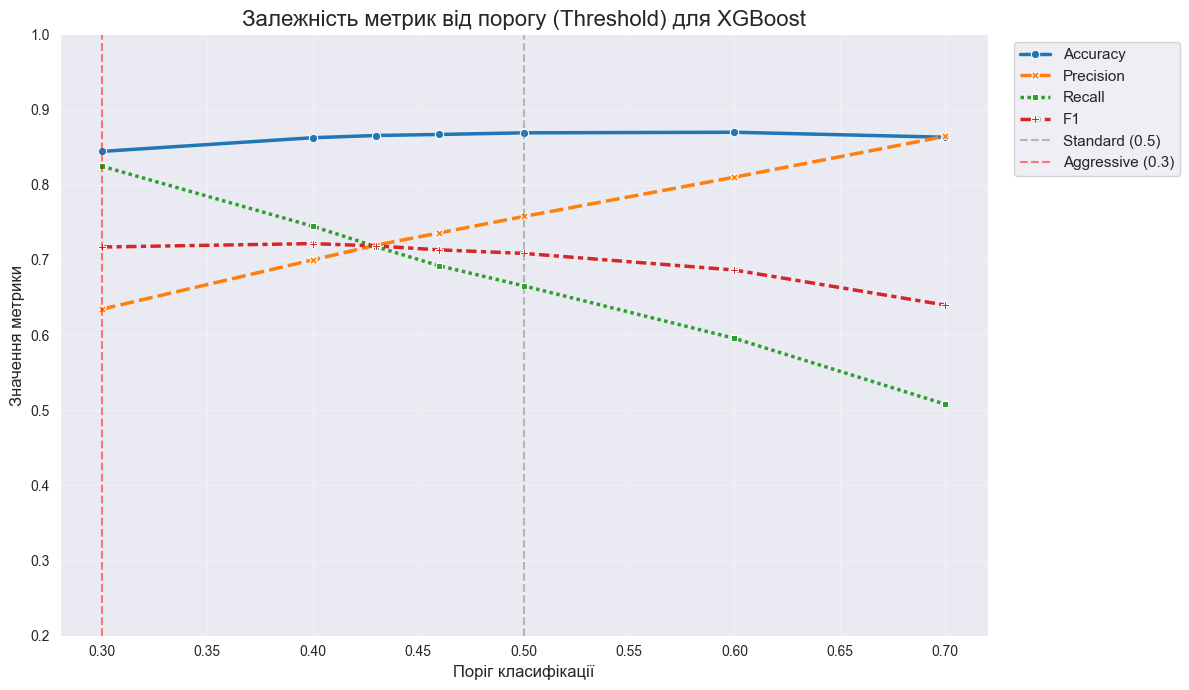

In [53]:
# --- ГРАФІК: ДИНАМІКА ВСІХ МЕТРИК ДЛЯ ОДНІЄЇ МОДЕЛІ ---

# Вибираємо модель для аналізу (зазвичай найкращу)
model_name = "XGBoost"  # Або "XGBoost", "LightGBM"

# Готуємо дані для цієї моделі
metrics_data = []

# Проходимо по збережених таблицях у словнику
for t, df in tables_dict.items():
    # Знаходимо рядок для нашої моделі
    row = df[df["Model"] == model_name].iloc[0]
    
    metrics_data.append({
        "Threshold": t,
        "Accuracy": row["Accuracy"],
        "Precision": row["Precision"],
        "Recall": row["Recall"],
        "F1": row["F1"]
    })

# Створюємо DataFrame для графіка
df_metrics_plot = pd.DataFrame(metrics_data)
df_melted = df_metrics_plot.melt(id_vars="Threshold", var_name="Metric", value_name="Score")

# Будуємо графік
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted, x="Threshold", y="Score", hue="Metric", style="Metric", markers=True, linewidth=2.5)

# Додаємо вертикальні лінії для цікавих точок (0.3 і 0.5)
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Standard (0.5)')
plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.5, label='Aggressive (0.3)')

plt.title(f"Залежність метрик від порогу (Threshold) для {model_name}", fontsize=16)
plt.xlabel("Поріг класифікації", fontsize=12)
plt.ylabel("Значення метрики", fontsize=12)
plt.ylim(0.2, 1.0)  # Межі по Y для кращої видимості
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

ТОЧКА ПЕРЕТИНУ (ЕКВІЛІБРІУМ):
Поріг: 0.4623
Значення Precision/Recall: 0.6780


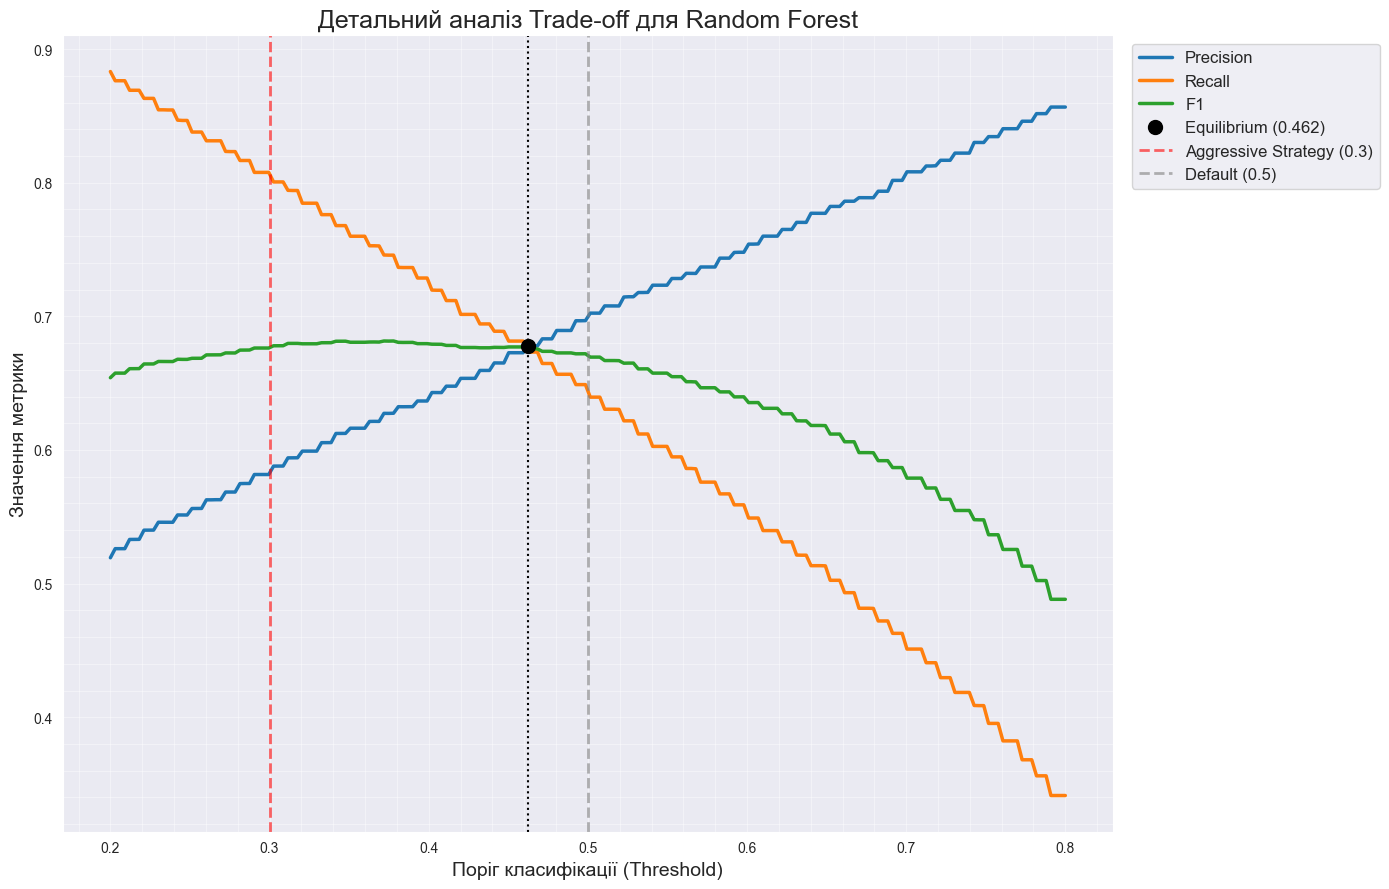

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Вибираємо модель для детального аналізу
model_name = "Random Forest" 
data = predictions_data[model_name]
y_true = data['y_true']
y_probas = data['probas']

# 1. Генеруємо багато точок для плавності (від 0.2 до 0.8 з кроком ~0.003)
fine_thresholds = np.linspace(0.2, 0.8, 200)
metrics_list = []

# 2. Рахуємо метрики для кожного мікро-порогу
for t in fine_thresholds:
    y_pred_t = (y_probas >= t).astype(int)
    
    metrics_list.append({
        "Threshold": t,
        "Precision": precision_score(y_true, y_pred_t, zero_division=0),
        "Recall": recall_score(y_true, y_pred_t, zero_division=0),
        "F1": f1_score(y_true, y_pred_t, zero_division=0)
    })

df_fine = pd.DataFrame(metrics_list)

# 3. Знаходимо точну точку перетину (де різниця між Precision і Recall мінімальна)
df_fine['Diff'] = abs(df_fine['Precision'] - df_fine['Recall'])
intersection_row = df_fine.loc[df_fine['Diff'].idxmin()]

intersect_thresh = intersection_row['Threshold']
intersect_val = intersection_row['Precision'] # Значення метрики в точці перетину

print(f"ТОЧКА ПЕРЕТИНУ (ЕКВІЛІБРІУМ):")
print(f"Поріг: {intersect_thresh:.4f}")
print(f"Значення Precision/Recall: {intersect_val:.4f}")

# 4. Будуємо великий графік
df_melted_fine = df_fine.melt(id_vars="Threshold", value_vars=["Precision", "Recall", "F1"], 
                              var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 9)) # Великий розмір
sns.lineplot(data=df_melted_fine, x="Threshold", y="Score", hue="Metric", linewidth=2.5)

# Малюємо точку перетину
plt.plot(intersect_thresh, intersect_val, 'ko', markersize=10, zorder=10, label=f'Equilibrium ({intersect_thresh:.3f})')
plt.axvline(x=intersect_thresh, color='black', linestyle=':', linewidth=1.5)

# Додаємо ваші стратегічні точки
plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.6, linewidth=2, label='Aggressive Strategy (0.3)')
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.6, linewidth=2, label='Default (0.5)')

# Оформлення
plt.title(f"Детальний аналіз Trade-off для {model_name}", fontsize=18)
plt.xlabel("Поріг класифікації (Threshold)", fontsize=14)
plt.ylabel("Значення метрики", fontsize=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.4, which='both')
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [55]:
tables_dict

{0.3:                  Model  Accuracy  Precision    Recall        F1
 3             LightGBM  0.838362   0.621984  0.827193  0.710059
 4             CatBoost  0.843367   0.631971  0.826955  0.716433
 2              XGBoost  0.844362   0.634452  0.824697  0.717172
 0  Logistic Regression  0.798152   0.553193  0.813287  0.658487
 1        Random Forest  0.814986   0.581650  0.807701  0.676286,
 0.4:                  Model  Accuracy  Precision    Recall        F1
 4             CatBoost  0.860173   0.692715  0.746969  0.718820
 0  Logistic Regression  0.824143   0.607959  0.746256  0.670046
 2              XGBoost  0.862562   0.699989  0.744830  0.721714
 3             LightGBM  0.858666   0.691248  0.739720  0.714663
 1        Random Forest  0.835575   0.636656  0.728667  0.679561,
 0.43:                  Model  Accuracy  Precision    Recall        F1
 0  Logistic Regression  0.831509   0.627838  0.726408  0.673536
 4             CatBoost  0.864013   0.713848  0.720466  0.717142
 2     

In [57]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Create validation set from training data
X_train_opt, X_val, y_train_opt, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set: {X_train_opt.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Classification threshold
THRESHOLD = 0.46

# ============================================================================
# 1. CATBOOST HYPERPARAMETER TUNING
# ============================================================================
print("\n" + "="*80)
print("TUNING CATBOOST")
print("="*80)

def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_state': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_opt, y_train_opt, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

    # Predict probabilities and apply threshold
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba >= THRESHOLD).astype(int)

    # Optimize for F1 score
    f1 = f1_score(y_val, y_pred)
    return f1

study_catboost = optuna.create_study(direction='maximize', study_name='catboost_study')
study_catboost.optimize(objective_catboost, n_trials=20, show_progress_bar=True)

print(f"\nBest CatBoost F1 Score: {study_catboost.best_value:.4f}")
print(f"Best CatBoost Parameters: {study_catboost.best_params}")

# ============================================================================
# 2. XGBOOST HYPERPARAMETER TUNING
# ============================================================================
print("\n" + "="*80)
print("TUNING XGBOOST")
print("="*80)

def objective_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
        'early_stopping_rounds': 50  # <--- MOVED HERE (Constructor)
    }

    model = XGBClassifier(**params)

    # Removed early_stopping_rounds from .fit()
    model.fit(X_train_opt, y_train_opt,
              eval_set=[(X_val, y_val)],
              verbose=0)

    # Predict probabilities and apply threshold
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba >= THRESHOLD).astype(int)

    f1 = f1_score(y_val, y_pred)
    return f1

study_xgboost = optuna.create_study(direction='maximize', study_name='xgboost_study')
study_xgboost.optimize(objective_xgboost, n_trials=20, show_progress_bar=True)

print(f"\nBest XGBoost F1 Score: {study_xgboost.best_value:.4f}")
print(f"Best XGBoost Parameters: {study_xgboost.best_params}")

# ============================================================================
# 3. LIGHTGBM HYPERPARAMETER TUNING (CORRECTED)
# ============================================================================
print("\n" + "="*80)
print("TUNING LIGHTGBM")
print("="*80)

def objective_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,
        'metric': 'auc'  # <--- CHANGE 1: Set internal metric to AUC
    }

    model = LGBMClassifier(**params)

    model.fit(X_train_opt, y_train_opt,
              eval_set=[(X_val, y_val)],
              # CHANGE 2: Monitor 'auc' instead of 'binary_logloss'
              callbacks=[optuna.integration.LightGBMPruningCallback(trial, 'auc')])

    # Predict probabilities and apply threshold
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba >= THRESHOLD).astype(int)

    # Optimize for F1 score
    f1 = f1_score(y_val, y_pred)
    return f1

study_lightgbm = optuna.create_study(direction='maximize', study_name='lightgbm_study')
study_lightgbm.optimize(objective_lightgbm, n_trials=20, show_progress_bar=True)

print(f"\nBest LightGBM F1 Score: {study_lightgbm.best_value:.4f}")
print(f"Best LightGBM Parameters: {study_lightgbm.best_params}")

# ============================================================================
# TRAIN BEST MODELS ON FULL TRAINING DATA
# ============================================================================
print("\n" + "="*80)
print("TRAINING BEST MODELS ON FULL TRAINING DATA")
print("="*80)

# Train CatBoost with best parameters
best_catboost = CatBoostClassifier(**study_catboost.best_params, random_state=42, verbose=0)
best_catboost.fit(X_train, y_train)
print("✓ CatBoost trained")

# Train XGBoost with best parameters
best_xgboost = XGBClassifier(**study_xgboost.best_params, random_state=42, n_jobs=-1)
best_xgboost.fit(X_train, y_train)
print("✓ XGBoost trained")

# Train LightGBM with best parameters
best_lightgbm = LGBMClassifier(**study_lightgbm.best_params, random_state=42, n_jobs=-1, verbose=-1)
best_lightgbm.fit(X_train, y_train)
print("✓ LightGBM trained")

# ============================================================================
# EVALUATE ON TEST SET
# ============================================================================
print("\n" + "="*80)
print("EVALUATION ON TEST SET")
print("="*80)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= THRESHOLD).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{model_name} Results:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  ROC AUC:   {roc_auc:.4f}")

    return y_pred_proba

# Evaluate individual models
catboost_proba = evaluate_model(best_catboost, X_test, y_test, "CatBoost")
xgboost_proba = evaluate_model(best_xgboost, X_test, y_test, "XGBoost")
lightgbm_proba = evaluate_model(best_lightgbm, X_test, y_test, "LightGBM")

# ============================================================================
# ENSEMBLE PREDICTION (AVERAGE OF 3 MODELS)
# ============================================================================
print("\n" + "="*80)
print("ENSEMBLE PREDICTION")
print("="*80)

# Average probabilities from all three models
ensemble_proba = (catboost_proba + xgboost_proba + lightgbm_proba) / 3
ensemble_pred = (ensemble_proba >= THRESHOLD).astype(int)

# Evaluate ensemble
accuracy = accuracy_score(y_test, ensemble_pred)
precision = precision_score(y_test, ensemble_pred)
recall = recall_score(y_test, ensemble_pred)
f1 = f1_score(y_test, ensemble_pred)
roc_auc = roc_auc_score(y_test, ensemble_proba)

print(f"\nEnsemble (Average) Results:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1 Score:  {f1:.4f}")
print(f"  ROC AUC:   {roc_auc:.4f}")

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Threshold used: {THRESHOLD}")
print(f"\nBest hyperparameters found:")
print(f"\nCatBoost: {study_catboost.best_params}")
print(f"\nXGBoost: {study_xgboost.best_params}")
print(f"\nLightGBM: {study_lightgbm.best_params}")

[I 2025-12-08 12:15:51,818] A new study created in memory with name: catboost_study


Training set: (28132, 97)
Validation set: (7033, 97)
Test set: (8792, 97)

TUNING CATBOOST


Best trial: 0. Best value: 0.729426:   5%|▌         | 1/20 [00:01<00:23,  1.22s/it]

[I 2025-12-08 12:15:53,035] Trial 0 finished with value: 0.729426433915212 and parameters: {'iterations': 325, 'learning_rate': 0.09448104980786105, 'depth': 6, 'l2_leaf_reg': 6.802819067178537, 'border_count': 210, 'random_strength': 0.7801283902802048, 'bagging_temperature': 0.18331752687403868}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  10%|█         | 2/20 [00:04<00:45,  2.54s/it]

[I 2025-12-08 12:15:56,496] Trial 1 finished with value: 0.7174323473882945 and parameters: {'iterations': 967, 'learning_rate': 0.020143031034769648, 'depth': 6, 'l2_leaf_reg': 9.456954543889827, 'border_count': 120, 'random_strength': 9.19054465984731, 'bagging_temperature': 0.3514830874721777}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  15%|█▌        | 3/20 [00:06<00:39,  2.30s/it]

[I 2025-12-08 12:15:58,510] Trial 2 finished with value: 0.7253499222395023 and parameters: {'iterations': 232, 'learning_rate': 0.10105542429195001, 'depth': 10, 'l2_leaf_reg': 9.08298472103114, 'border_count': 177, 'random_strength': 4.31288199449403, 'bagging_temperature': 0.8408177386531334}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  20%|██        | 4/20 [00:08<00:34,  2.14s/it]

[I 2025-12-08 12:16:00,406] Trial 3 finished with value: 0.7235516372795969 and parameters: {'iterations': 627, 'learning_rate': 0.03464128039847137, 'depth': 5, 'l2_leaf_reg': 7.614058047625848, 'border_count': 156, 'random_strength': 5.552037700728777, 'bagging_temperature': 0.5997684735733744}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  25%|██▌       | 5/20 [00:12<00:38,  2.60s/it]

[I 2025-12-08 12:16:03,822] Trial 4 finished with value: 0.728406610539445 and parameters: {'iterations': 777, 'learning_rate': 0.030808877851799196, 'depth': 8, 'l2_leaf_reg': 1.3069032670057001, 'border_count': 244, 'random_strength': 1.048665519927252, 'bagging_temperature': 0.460855391862223}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  30%|███       | 6/20 [00:14<00:33,  2.41s/it]

[I 2025-12-08 12:16:05,854] Trial 5 finished with value: 0.7244929797191888 and parameters: {'iterations': 477, 'learning_rate': 0.038904299997844206, 'depth': 8, 'l2_leaf_reg': 2.119220220522989, 'border_count': 72, 'random_strength': 4.988610150718198, 'bagging_temperature': 0.800603557767648}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  35%|███▌      | 7/20 [00:14<00:22,  1.75s/it]

[I 2025-12-08 12:16:06,242] Trial 6 finished with value: 0.6755526657997399 and parameters: {'iterations': 107, 'learning_rate': 0.06388400127043933, 'depth': 6, 'l2_leaf_reg': 9.464206713870166, 'border_count': 106, 'random_strength': 7.228951148175499, 'bagging_temperature': 0.0855484681072346}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  40%|████      | 8/20 [00:15<00:18,  1.53s/it]

[I 2025-12-08 12:16:07,310] Trial 7 finished with value: 0.728287841191067 and parameters: {'iterations': 700, 'learning_rate': 0.18539268323566113, 'depth': 5, 'l2_leaf_reg': 8.293012076816073, 'border_count': 203, 'random_strength': 2.6909189289724877, 'bagging_temperature': 0.17379577435326132}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  45%|████▌     | 9/20 [00:17<00:16,  1.54s/it]

[I 2025-12-08 12:16:08,877] Trial 8 finished with value: 0.7218045112781954 and parameters: {'iterations': 476, 'learning_rate': 0.05785229386688222, 'depth': 5, 'l2_leaf_reg': 7.309984670695291, 'border_count': 61, 'random_strength': 9.634429407055741, 'bagging_temperature': 0.9225787805057442}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  50%|█████     | 10/20 [00:17<00:12,  1.27s/it]

[I 2025-12-08 12:16:09,532] Trial 9 finished with value: 0.6746987951807228 and parameters: {'iterations': 141, 'learning_rate': 0.03889385904111244, 'depth': 8, 'l2_leaf_reg': 1.0724750960367588, 'border_count': 157, 'random_strength': 9.74201650256584, 'bagging_temperature': 0.39376032599066657}. Best is trial 0 with value: 0.729426433915212.


Best trial: 0. Best value: 0.729426:  55%|█████▌    | 11/20 [00:18<00:10,  1.17s/it]

[I 2025-12-08 12:16:10,495] Trial 10 finished with value: 0.6805280528052805 and parameters: {'iterations': 333, 'learning_rate': 0.0108447642455077, 'depth': 4, 'l2_leaf_reg': 4.77483062283477, 'border_count': 253, 'random_strength': 0.3256877372377929, 'bagging_temperature': 0.23670312534104054}. Best is trial 0 with value: 0.729426433915212.


Best trial: 11. Best value: 0.732673:  60%|██████    | 12/20 [00:19<00:08,  1.12s/it]

[I 2025-12-08 12:16:11,483] Trial 11 finished with value: 0.7326732673267327 and parameters: {'iterations': 834, 'learning_rate': 0.14896280813080673, 'depth': 8, 'l2_leaf_reg': 5.0392490385481405, 'border_count': 255, 'random_strength': 0.076201651218188, 'bagging_temperature': 0.5624385959915039}. Best is trial 11 with value: 0.7326732673267327.


Best trial: 11. Best value: 0.732673:  65%|██████▌   | 13/20 [00:20<00:06,  1.01it/s]

[I 2025-12-08 12:16:12,180] Trial 12 finished with value: 0.7223084083152342 and parameters: {'iterations': 994, 'learning_rate': 0.2983066880682149, 'depth': 9, 'l2_leaf_reg': 5.241294332597294, 'border_count': 205, 'random_strength': 1.952129077077359, 'bagging_temperature': 0.5953004340630269}. Best is trial 11 with value: 0.7326732673267327.


Best trial: 11. Best value: 0.732673:  70%|███████   | 14/20 [00:21<00:06,  1.11s/it]

[I 2025-12-08 12:16:13,580] Trial 13 finished with value: 0.7278932671424139 and parameters: {'iterations': 844, 'learning_rate': 0.12636962634130175, 'depth': 7, 'l2_leaf_reg': 3.3983717185166724, 'border_count': 220, 'random_strength': 3.0380472166914902, 'bagging_temperature': 0.009199741760275909}. Best is trial 11 with value: 0.7326732673267327.


Best trial: 14. Best value: 0.733871:  75%|███████▌  | 15/20 [00:23<00:05,  1.20s/it]

[I 2025-12-08 12:16:14,977] Trial 14 finished with value: 0.7338709677419355 and parameters: {'iterations': 362, 'learning_rate': 0.10017949745755012, 'depth': 7, 'l2_leaf_reg': 5.703277993521533, 'border_count': 234, 'random_strength': 0.08892665394913246, 'bagging_temperature': 0.6494508318048355}. Best is trial 14 with value: 0.7338709677419355.


Best trial: 14. Best value: 0.733871:  80%|████████  | 16/20 [00:24<00:04,  1.17s/it]

[I 2025-12-08 12:16:16,096] Trial 15 finished with value: 0.7246287128712872 and parameters: {'iterations': 544, 'learning_rate': 0.18723255967978633, 'depth': 10, 'l2_leaf_reg': 4.195193975936219, 'border_count': 255, 'random_strength': 0.12032733327437053, 'bagging_temperature': 0.6774012926072993}. Best is trial 14 with value: 0.7338709677419355.


Best trial: 14. Best value: 0.733871:  85%|████████▌ | 17/20 [00:25<00:03,  1.13s/it]

[I 2025-12-08 12:16:17,120] Trial 16 finished with value: 0.7255266418835192 and parameters: {'iterations': 382, 'learning_rate': 0.2821244817790715, 'depth': 9, 'l2_leaf_reg': 6.2658337047408, 'border_count': 227, 'random_strength': 1.8677285494057263, 'bagging_temperature': 0.6986659609314433}. Best is trial 14 with value: 0.7338709677419355.


Best trial: 14. Best value: 0.733871:  90%|█████████ | 18/20 [00:26<00:02,  1.09s/it]

[I 2025-12-08 12:16:18,132] Trial 17 finished with value: 0.7305426356589148 and parameters: {'iterations': 610, 'learning_rate': 0.15438651786493565, 'depth': 7, 'l2_leaf_reg': 3.575958740569641, 'border_count': 183, 'random_strength': 3.477407562570503, 'bagging_temperature': 0.5622868261655692}. Best is trial 14 with value: 0.7338709677419355.


Best trial: 14. Best value: 0.733871:  95%|█████████▌| 19/20 [00:28<00:01,  1.52s/it]

[I 2025-12-08 12:16:20,651] Trial 18 finished with value: 0.7298725520671433 and parameters: {'iterations': 842, 'learning_rate': 0.07801355533115446, 'depth': 9, 'l2_leaf_reg': 5.86127897122305, 'border_count': 185, 'random_strength': 7.360324746867658, 'bagging_temperature': 0.7337599093959725}. Best is trial 14 with value: 0.7338709677419355.


Best trial: 14. Best value: 0.733871: 100%|██████████| 20/20 [00:29<00:00,  1.49s/it]
[I 2025-12-08 12:16:21,565] A new study created in memory with name: xgboost_study


[I 2025-12-08 12:16:21,561] Trial 19 finished with value: 0.732938610158928 and parameters: {'iterations': 230, 'learning_rate': 0.1133218547013795, 'depth': 7, 'l2_leaf_reg': 2.94713007716919, 'border_count': 234, 'random_strength': 1.6474557621727612, 'bagging_temperature': 0.979413332995779}. Best is trial 14 with value: 0.7338709677419355.

Best CatBoost F1 Score: 0.7339
Best CatBoost Parameters: {'iterations': 362, 'learning_rate': 0.10017949745755012, 'depth': 7, 'l2_leaf_reg': 5.703277993521533, 'border_count': 234, 'random_strength': 0.08892665394913246, 'bagging_temperature': 0.6494508318048355}

TUNING XGBOOST


Best trial: 0. Best value: 0.721981:   5%|▌         | 1/20 [00:01<00:20,  1.06s/it]

[I 2025-12-08 12:16:22,622] Trial 0 finished with value: 0.7219814241486068 and parameters: {'n_estimators': 275, 'learning_rate': 0.03095957234211461, 'max_depth': 10, 'min_child_weight': 7, 'subsample': 0.7360162964599638, 'colsample_bytree': 0.9385495470851131, 'gamma': 4.276246705283979, 'reg_alpha': 1.035886203890208, 'reg_lambda': 4.992692542760359}. Best is trial 0 with value: 0.7219814241486068.


Best trial: 1. Best value: 0.726209:  10%|█         | 2/20 [00:02<00:21,  1.20s/it]

[I 2025-12-08 12:16:23,916] Trial 1 finished with value: 0.7262088081305821 and parameters: {'n_estimators': 433, 'learning_rate': 0.04535561436683699, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.8427941171648944, 'colsample_bytree': 0.8143113914475207, 'gamma': 1.5448251659907697, 'reg_alpha': 3.2386601069824343, 'reg_lambda': 3.5743614555400534}. Best is trial 1 with value: 0.7262088081305821.


Best trial: 2. Best value: 0.729076:  15%|█▌        | 3/20 [00:03<00:16,  1.01it/s]

[I 2025-12-08 12:16:24,656] Trial 2 finished with value: 0.7290762554246745 and parameters: {'n_estimators': 287, 'learning_rate': 0.2148964583667425, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.8679441090807103, 'colsample_bytree': 0.8745528390014656, 'gamma': 0.8501343874974343, 'reg_alpha': 1.941415545081261, 'reg_lambda': 1.753308938555353}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  20%|██        | 4/20 [00:04<00:15,  1.04it/s]

[I 2025-12-08 12:16:25,588] Trial 3 finished with value: 0.6925315227934045 and parameters: {'n_estimators': 349, 'learning_rate': 0.020961517461557316, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.9450375516831324, 'colsample_bytree': 0.8174428573598416, 'gamma': 3.787929907033707, 'reg_alpha': 4.066730509905857, 'reg_lambda': 2.1915422536324884}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  25%|██▌       | 5/20 [00:05<00:18,  1.21s/it]

[I 2025-12-08 12:16:27,234] Trial 4 finished with value: 0.718525460793502 and parameters: {'n_estimators': 398, 'learning_rate': 0.014459880117522538, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.9851481460164999, 'colsample_bytree': 0.6672515857900906, 'gamma': 0.8070458527597646, 'reg_alpha': 2.149671966445505, 'reg_lambda': 1.1390744287246546}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  30%|███       | 6/20 [00:07<00:20,  1.43s/it]

[I 2025-12-08 12:16:29,095] Trial 5 finished with value: 0.7221876942200124 and parameters: {'n_estimators': 699, 'learning_rate': 0.031205255321367385, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.6560724880110085, 'colsample_bytree': 0.8350054813119685, 'gamma': 4.214166478489431, 'reg_alpha': 3.319383762840375, 'reg_lambda': 0.5560426768946536}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  35%|███▌      | 7/20 [00:09<00:18,  1.45s/it]

[I 2025-12-08 12:16:30,577] Trial 6 finished with value: 0.7253152876038143 and parameters: {'n_estimators': 692, 'learning_rate': 0.058238910305378117, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.7219321178227639, 'colsample_bytree': 0.9387798701269761, 'gamma': 1.0976746447714785, 'reg_alpha': 4.659012785385716, 'reg_lambda': 4.647950215583996}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  40%|████      | 8/20 [00:09<00:14,  1.17s/it]

[I 2025-12-08 12:16:31,162] Trial 7 finished with value: 0.7248073959938367 and parameters: {'n_estimators': 810, 'learning_rate': 0.11554464840442609, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.6134319286225766, 'colsample_bytree': 0.9473010437251376, 'gamma': 2.544609622959031, 'reg_alpha': 0.19392072235378033, 'reg_lambda': 0.18777407089555942}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  45%|████▌     | 9/20 [00:11<00:16,  1.49s/it]

[I 2025-12-08 12:16:33,343] Trial 8 finished with value: 0.7225163500467144 and parameters: {'n_estimators': 537, 'learning_rate': 0.01602942965790857, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.8992191167424314, 'colsample_bytree': 0.8960560728842034, 'gamma': 0.16510645062662865, 'reg_alpha': 0.8140956101463542, 'reg_lambda': 0.4491776744942938}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  50%|█████     | 10/20 [00:12<00:13,  1.38s/it]

[I 2025-12-08 12:16:34,473] Trial 9 finished with value: 0.7168863779033271 and parameters: {'n_estimators': 395, 'learning_rate': 0.026442533204808216, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8299802335162613, 'colsample_bytree': 0.8027490566191157, 'gamma': 0.3722305742205323, 'reg_alpha': 1.486299850153594, 'reg_lambda': 4.098483988999472}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  55%|█████▌    | 11/20 [00:13<00:09,  1.08s/it]

[I 2025-12-08 12:16:34,887] Trial 10 finished with value: 0.7248529866914268 and parameters: {'n_estimators': 139, 'learning_rate': 0.24062292764182575, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.7668510508692028, 'colsample_bytree': 0.6747363149864167, 'gamma': 2.1346906353828774, 'reg_alpha': 2.025061304127943, 'reg_lambda': 2.2339260099561637}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  60%|██████    | 12/20 [00:13<00:07,  1.10it/s]

[I 2025-12-08 12:16:35,412] Trial 11 finished with value: 0.7253694581280788 and parameters: {'n_estimators': 130, 'learning_rate': 0.08049316067765566, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.8471284522845631, 'colsample_bytree': 0.7262287767588962, 'gamma': 1.729746919407022, 'reg_alpha': 3.021532604460954, 'reg_lambda': 3.2348805149381854}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 2. Best value: 0.729076:  65%|██████▌   | 13/20 [00:14<00:06,  1.07it/s]

[I 2025-12-08 12:16:36,401] Trial 12 finished with value: 0.7238272755514135 and parameters: {'n_estimators': 500, 'learning_rate': 0.26324630421601575, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.889117541506752, 'colsample_bytree': 0.8670263713026638, 'gamma': 3.054511421419841, 'reg_alpha': 3.0210989659119947, 'reg_lambda': 3.2854543118069}. Best is trial 2 with value: 0.7290762554246745.


Best trial: 13. Best value: 0.730639:  70%|███████   | 14/20 [00:16<00:06,  1.07s/it]

[I 2025-12-08 12:16:37,779] Trial 13 finished with value: 0.730638691761802 and parameters: {'n_estimators': 962, 'learning_rate': 0.12484786415898305, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.8047897900031925, 'colsample_bytree': 0.7469257686300679, 'gamma': 1.4407463261466829, 'reg_alpha': 3.5281320564752354, 'reg_lambda': 1.7875626015621362}. Best is trial 13 with value: 0.730638691761802.


Best trial: 13. Best value: 0.730639:  75%|███████▌  | 15/20 [00:16<00:04,  1.02it/s]

[I 2025-12-08 12:16:38,542] Trial 14 finished with value: 0.7287925696594427 and parameters: {'n_estimators': 994, 'learning_rate': 0.14703801771612754, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.7852948134575504, 'colsample_bytree': 0.7363210150570368, 'gamma': 1.0750921962703879, 'reg_alpha': 4.123347728145351, 'reg_lambda': 1.4510546874277828}. Best is trial 13 with value: 0.730638691761802.


Best trial: 13. Best value: 0.730639:  80%|████████  | 16/20 [00:18<00:04,  1.09s/it]

[I 2025-12-08 12:16:39,887] Trial 15 finished with value: 0.723976242575805 and parameters: {'n_estimators': 998, 'learning_rate': 0.1632868133134876, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.8968086772940452, 'colsample_bytree': 0.7431337223122741, 'gamma': 2.855241166745146, 'reg_alpha': 2.4573506141324657, 'reg_lambda': 1.5964170508037636}. Best is trial 13 with value: 0.730638691761802.


Best trial: 13. Best value: 0.730639:  85%|████████▌ | 17/20 [00:19<00:03,  1.03s/it]

[I 2025-12-08 12:16:40,779] Trial 16 finished with value: 0.7295792079207921 and parameters: {'n_estimators': 855, 'learning_rate': 0.09576755273685789, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.7207237445391421, 'colsample_bytree': 0.6035489998120315, 'gamma': 1.6746372741073943, 'reg_alpha': 1.6618656615378269, 'reg_lambda': 2.650424395775949}. Best is trial 13 with value: 0.730638691761802.


Best trial: 13. Best value: 0.730639:  90%|█████████ | 18/20 [00:20<00:02,  1.14s/it]

[I 2025-12-08 12:16:42,170] Trial 17 finished with value: 0.7291730710113741 and parameters: {'n_estimators': 847, 'learning_rate': 0.10051443480237711, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.6919774691457724, 'colsample_bytree': 0.6128148654312179, 'gamma': 1.8961408600829333, 'reg_alpha': 3.952942981252069, 'reg_lambda': 2.648556362236149}. Best is trial 13 with value: 0.730638691761802.


Best trial: 13. Best value: 0.730639:  95%|█████████▌| 19/20 [00:21<00:01,  1.11s/it]

[I 2025-12-08 12:16:43,218] Trial 18 finished with value: 0.7249690976514215 and parameters: {'n_estimators': 871, 'learning_rate': 0.07507917466319657, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.6679540919574549, 'colsample_bytree': 0.6000605044391654, 'gamma': 3.425178011474062, 'reg_alpha': 1.4195434489399603, 'reg_lambda': 2.6564877952365054}. Best is trial 13 with value: 0.730638691761802.


Best trial: 13. Best value: 0.730639: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
[I 2025-12-08 12:16:44,848] A new study created in memory with name: lightgbm_study


[I 2025-12-08 12:16:44,845] Trial 19 finished with value: 0.717852684144819 and parameters: {'n_estimators': 676, 'learning_rate': 0.04971104529710224, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.7570321146679917, 'colsample_bytree': 0.6469262688092196, 'gamma': 4.849808835086254, 'reg_alpha': 4.858977101306066, 'reg_lambda': 0.9705604141948065}. Best is trial 13 with value: 0.730638691761802.

Best XGBoost F1 Score: 0.7306
Best XGBoost Parameters: {'n_estimators': 962, 'learning_rate': 0.12484786415898305, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.8047897900031925, 'colsample_bytree': 0.7469257686300679, 'gamma': 1.4407463261466829, 'reg_alpha': 3.5281320564752354, 'reg_lambda': 1.7875626015621362}

TUNING LIGHTGBM


Best trial: 0. Best value: 0.689116:   5%|▌         | 1/20 [00:03<01:09,  3.64s/it]

[I 2025-12-08 12:16:48,491] Trial 0 finished with value: 0.6891160553217077 and parameters: {'n_estimators': 423, 'learning_rate': 0.28171891479966543, 'max_depth': 10, 'num_leaves': 139, 'min_child_samples': 87, 'subsample': 0.7500199301759628, 'colsample_bytree': 0.9319027398554676, 'reg_alpha': 0.8812041880249211, 'reg_lambda': 1.2758898486495225}. Best is trial 0 with value: 0.6891160553217077.


Best trial: 1. Best value: 0.727385:  10%|█         | 2/20 [00:07<01:08,  3.80s/it]

[I 2025-12-08 12:16:52,395] Trial 1 finished with value: 0.7273849953689411 and parameters: {'n_estimators': 492, 'learning_rate': 0.02567651653566713, 'max_depth': 9, 'num_leaves': 107, 'min_child_samples': 18, 'subsample': 0.939445118332811, 'colsample_bytree': 0.8432354971142186, 'reg_alpha': 2.648656883403847, 'reg_lambda': 3.44569075478306}. Best is trial 1 with value: 0.7273849953689411.


Best trial: 1. Best value: 0.727385:  15%|█▌        | 3/20 [00:08<00:40,  2.40s/it]

[I 2025-12-08 12:16:53,131] Trial 2 finished with value: 0.7263681592039801 and parameters: {'n_estimators': 519, 'learning_rate': 0.1727553540231083, 'max_depth': 3, 'num_leaves': 54, 'min_child_samples': 11, 'subsample': 0.8609285262273288, 'colsample_bytree': 0.9377141089964174, 'reg_alpha': 3.842084713972882, 'reg_lambda': 4.466981436784478}. Best is trial 1 with value: 0.7273849953689411.


Best trial: 3. Best value: 0.729354:  20%|██        | 4/20 [00:10<00:36,  2.25s/it]

[I 2025-12-08 12:16:55,163] Trial 3 finished with value: 0.729353541602227 and parameters: {'n_estimators': 560, 'learning_rate': 0.023054807265414333, 'max_depth': 7, 'num_leaves': 150, 'min_child_samples': 93, 'subsample': 0.8190314606003675, 'colsample_bytree': 0.7214885294498197, 'reg_alpha': 4.6670024043762, 'reg_lambda': 0.45265042528474464}. Best is trial 3 with value: 0.729353541602227.


Best trial: 3. Best value: 0.729354:  25%|██▌       | 5/20 [00:11<00:26,  1.75s/it]

[I 2025-12-08 12:16:56,011] Trial 4 finished with value: 0.7170506912442396 and parameters: {'n_estimators': 196, 'learning_rate': 0.21285959700284288, 'max_depth': 7, 'num_leaves': 128, 'min_child_samples': 81, 'subsample': 0.7982776819516604, 'colsample_bytree': 0.6817711198891266, 'reg_alpha': 2.712572155914097, 'reg_lambda': 3.639594928153626}. Best is trial 3 with value: 0.729353541602227.
[I 2025-12-08 12:16:56,055] Trial 5 pruned. Trial was pruned at iteration 0.


Best trial: 3. Best value: 0.729354:  50%|█████     | 10/20 [00:17<00:12,  1.23s/it]

[I 2025-12-08 12:17:02,574] Trial 6 finished with value: 0.7037037037037037 and parameters: {'n_estimators': 895, 'learning_rate': 0.09999714010976125, 'max_depth': 8, 'num_leaves': 144, 'min_child_samples': 22, 'subsample': 0.6720420895569, 'colsample_bytree': 0.9508297715398777, 'reg_alpha': 1.022386891863067, 'reg_lambda': 2.9296389525305195}. Best is trial 3 with value: 0.729353541602227.
[I 2025-12-08 12:17:02,621] Trial 7 pruned. Trial was pruned at iteration 1.
[I 2025-12-08 12:17:02,653] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2025-12-08 12:17:02,691] Trial 9 pruned. Trial was pruned at iteration 1.
[I 2025-12-08 12:17:02,736] Trial 10 pruned. Trial was pruned at iteration 1.


Best trial: 3. Best value: 0.729354:  60%|██████    | 12/20 [00:18<00:06,  1.18it/s]

[I 2025-12-08 12:17:02,841] Trial 11 pruned. Trial was pruned at iteration 9.
[I 2025-12-08 12:17:02,888] Trial 12 pruned. Trial was pruned at iteration 0.


Best trial: 3. Best value: 0.729354:  80%|████████  | 16/20 [00:18<00:01,  2.25it/s]

[I 2025-12-08 12:17:03,065] Trial 13 pruned. Trial was pruned at iteration 16.
[I 2025-12-08 12:17:03,115] Trial 14 pruned. Trial was pruned at iteration 1.
[I 2025-12-08 12:17:03,230] Trial 15 pruned. Trial was pruned at iteration 11.


Best trial: 3. Best value: 0.729354: 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


[I 2025-12-08 12:17:03,292] Trial 16 pruned. Trial was pruned at iteration 3.
[I 2025-12-08 12:17:03,341] Trial 17 pruned. Trial was pruned at iteration 1.
[I 2025-12-08 12:17:03,384] Trial 18 pruned. Trial was pruned at iteration 1.
[I 2025-12-08 12:17:03,437] Trial 19 pruned. Trial was pruned at iteration 1.

Best LightGBM F1 Score: 0.7294
Best LightGBM Parameters: {'n_estimators': 560, 'learning_rate': 0.023054807265414333, 'max_depth': 7, 'num_leaves': 150, 'min_child_samples': 93, 'subsample': 0.8190314606003675, 'colsample_bytree': 0.7214885294498197, 'reg_alpha': 4.6670024043762, 'reg_lambda': 0.45265042528474464}

TRAINING BEST MODELS ON FULL TRAINING DATA
✓ CatBoost trained
✓ XGBoost trained
✓ LightGBM trained

EVALUATION ON TEST SET

CatBoost Results:
  Accuracy:  0.8743
  Precision: 0.7667
  Recall:    0.6825
  F1 Score:  0.7222
  ROC AUC:   0.9307

XGBoost Results:
  Accuracy:  0.8745
  Precision: 0.7633
  Recall:    0.6896
  F1 Score:  0.7246
  ROC AUC:   0.9309

LightGBM 


Example: Start processing CatBoost...


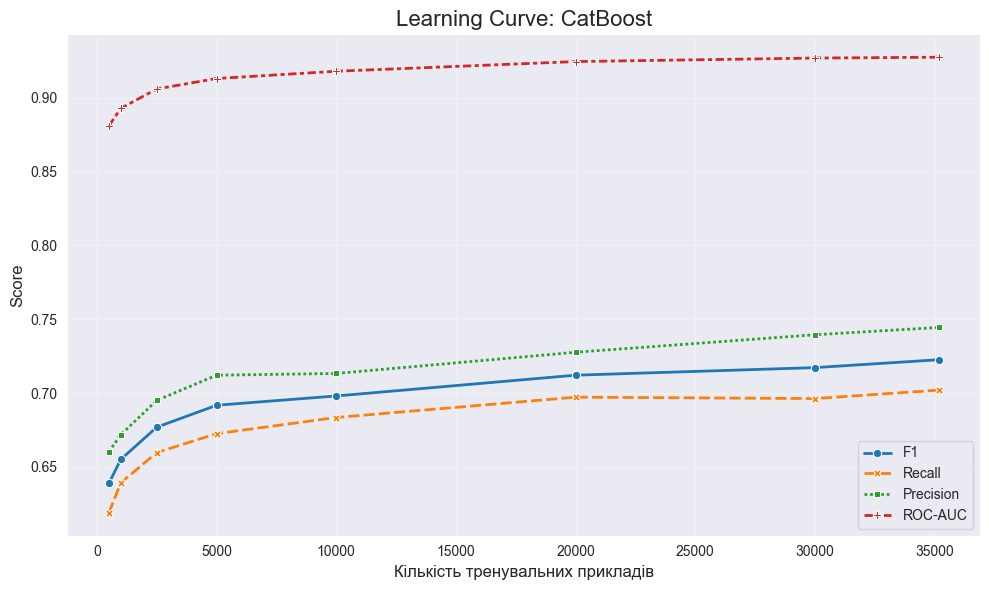


Example: Start processing XGBoost...


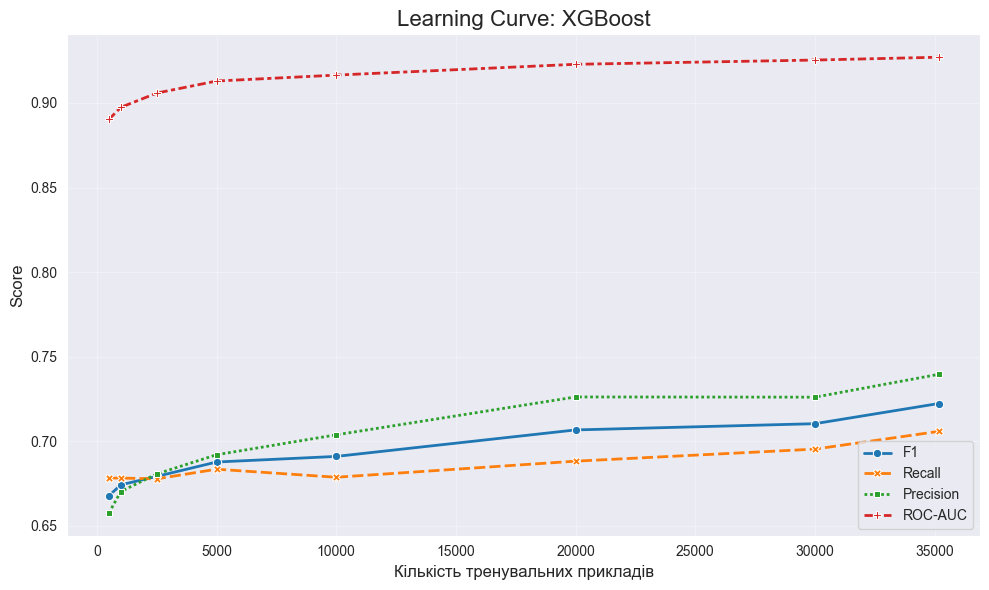


Example: Start processing LightGBM...


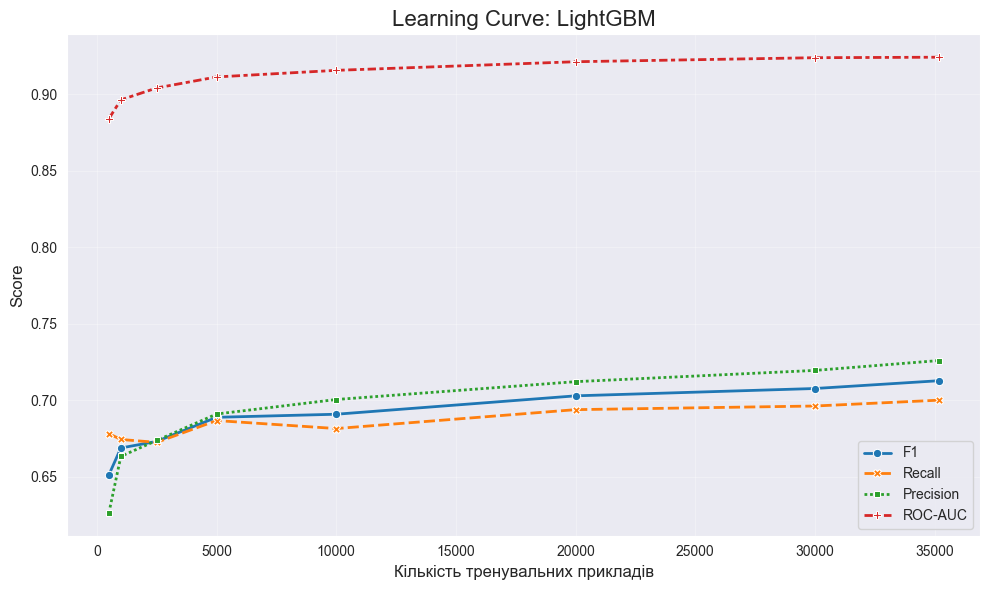

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, average_precision_score

# Імпортуємо класифікатори, якщо ще не імпортовані
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")

# 1. Налаштування
# Використовуємо параметри, знайдені Optuna в попередніх кроках
# (припускаємо, що об'єкти study_catboost, study_xgboost, study_lightgbm існують)

models_to_test = [
    {
        "name": "CatBoost",
        "class": CatBoostClassifier,
        "params": study_catboost.best_params,
        "extra_args": {'verbose': 0, 'random_state': 42, 'allow_writing_files': False}
    },
    {
        "name": "XGBoost",
        "class": XGBClassifier,
        "params": study_xgboost.best_params,
        "extra_args": {'n_jobs': -1, 'random_state': 42, 'verbosity': 0}
    },
    {
        "name": "LightGBM",
        "class": LGBMClassifier,
        "params": study_lightgbm.best_params,
        "extra_args": {'n_jobs': -1, 'random_state': 42, 'verbose': -1}
    }
]

# Визначаємо кроки для осі Х (розміри вибірок)
train_sizes = [500, 1000, 2500, 5000] + list(range(10000, len(X_train) + 1, 10000))
if train_sizes[-1] < len(X_train):
    train_sizes.append(len(X_train))

# Функція для побудови графіку для однієї моделі
def plot_learning_curve_for_model(model_info):
    name = model_info['name']
    print(f"\nExample: Start processing {name}...")

    # Об'єднуємо найкращі параметри з технічними аргументами
    full_params = {**model_info['params'], **model_info['extra_args']}

    learning_curve_results = []

    for size in train_sizes:
        # Беремо підмножину даних
        if isinstance(X_train, pd.DataFrame):
            X_subset = X_train.iloc[:size]
            y_subset = y_train.iloc[:size]
        else:
            X_subset = X_train[:size]
            y_subset = y_train[:size]

        # Перевірка класів
        class_counts = y_subset.value_counts()
        min_class_count = class_counts.min()

        if len(class_counts) < 2:
            continue

        # Ініціалізація моделі
        model = model_info['class'](**full_params)

        # Логіка Pipeline зі SMOTE
        if min_class_count < 2:
            pipeline = ImbPipeline([('model', model)])
        else:
            k_neighbors = min(5, min_class_count - 1)
            pipeline = ImbPipeline([
                ('smote', SMOTE(random_state=42, k_neighbors=k_neighbors)),
                ('model', model)
            ])

        # Навчання
        pipeline.fit(X_subset, y_subset)

        # Прогноз (ймовірності)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        # Застосування нашого порогу
        y_pred = (y_proba >= THRESHOLD).astype(int)

        # Зберігаємо результати
        res = {
            "Train Size": size,
            "F1": f1_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
        }
        learning_curve_results.append(res)

    # Візуалізація
    lc_df = pd.DataFrame(learning_curve_results)

    plt.figure(figsize=(10, 6))
    lc_melted = lc_df.melt(id_vars="Train Size", var_name="Metric", value_name="Score")
    sns.lineplot(data=lc_melted, x="Train Size", y="Score", hue="Metric", style="Metric", markers=True, linewidth=2)

    plt.title(f"Learning Curve: {name}", fontsize=16)
    plt.xlabel("Кількість тренувальних прикладів", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2. Запуск циклу по моделях
for model_info in models_to_test:
    plot_learning_curve_for_model(model_info)

warnings.resetwarnings()

Model           | Accuracy   | Margin (+/-)    | Interval (95%)
----------------------------------------------------------------------
CatBoost        | 0.8743     | +/- 0.0069      | [0.8674, 0.8812]
XGBoost         | 0.8745     | +/- 0.0069      | [0.8676, 0.8815]
LightGBM        | 0.8739     | +/- 0.0069      | [0.8669, 0.8808]


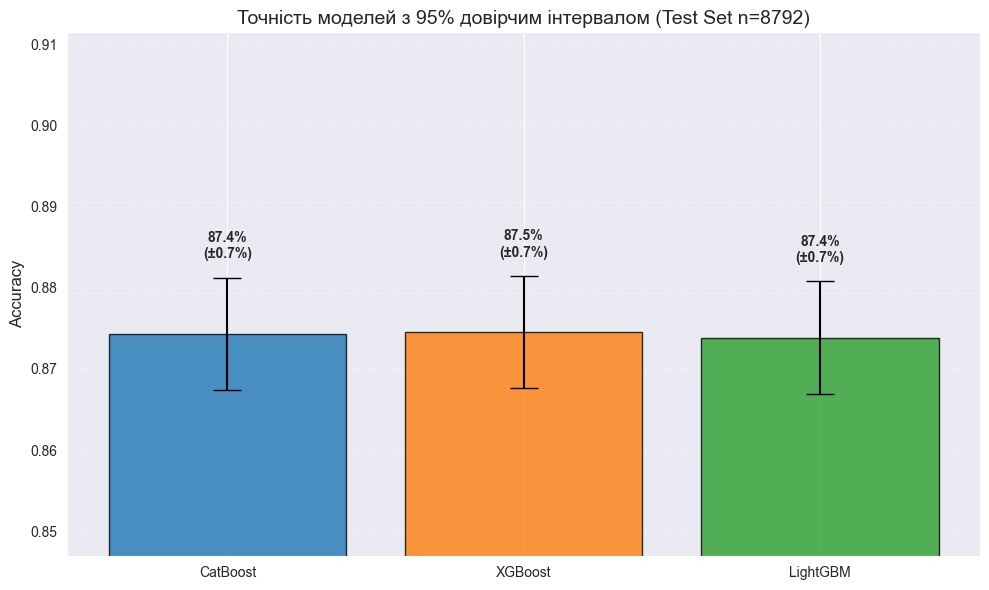

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.metrics import accuracy_score

# Налаштування
CONFIDENCE = 0.95
z_score = st.norm.ppf((1 + CONFIDENCE) / 2) # Для 95% це буде ~1.96
n_test = len(y_test)

models = [
    ("CatBoost", best_catboost),
    ("XGBoost", best_xgboost),
    ("LightGBM", best_lightgbm)
]

results_ci = []

print(f"{'Model':<15} | {'Accuracy':<10} | {'Margin (+/-)':<15} | {'Interval (95%)'}")
print("-" * 70)

for name, model in models:
    # Отримуємо передбачення з врахуванням нашого порогу
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= THRESHOLD).astype(int)
    
    # 1. Рахуємо точність (p)
    acc = accuracy_score(y_test, y_pred)
    
    # 2. Рахуємо стандартну похибку (Standard Error) для пропорції
    # SE = sqrt( p * (1-p) / n )
    se = np.sqrt((acc * (1 - acc)) / n_test)
    
    # 3. Рахуємо межу похибки (Margin of Error)
    margin = z_score * se
    
    # Нижня і верхня межі
    lower_bound = acc - margin
    upper_bound = acc + margin
    
    results_ci.append({
        "Model": name,
        "Accuracy": acc,
        "Margin": margin,
        "Lower": lower_bound,
        "Upper": upper_bound
    })
    
    print(f"{name:<15} | {acc:.4f}     | +/- {margin:.4f}      | [{lower_bound:.4f}, {upper_bound:.4f}]")

# ==========================================
# ВІЗУАЛІЗАЦІЯ
# ==========================================
df_ci = pd.DataFrame(results_ci)

plt.figure(figsize=(10, 6))

# Будуємо стовпчики точності
bars = plt.bar(df_ci["Model"], df_ci["Accuracy"], 
               yerr=df_ci["Margin"],   # Це малює "вусики" (error bars)
               capsize=10,             # Ширина шапочки вусика
               color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
               alpha=0.8,
               edgecolor='black')

# Додаємо підписи значень
for bar, margin, acc in zip(bars, df_ci["Margin"], df_ci["Accuracy"]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + margin + 0.002, 
             f"{acc:.1%}\n(±{margin:.1%})", 
             ha='center', va='bottom', fontweight='bold')

plt.ylim(df_ci["Lower"].min() - 0.02, df_ci["Upper"].max() + 0.03)
plt.title(f"Точність моделей з 95% довірчим інтервалом (Test Set n={n_test})", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()